In [2]:
import yfinance as yf
import cudf as cd
import matplotlib.pyplot as plt
import os

In [2]:
smh = yf.Ticker("CL=F")
stock_smh = cd.DataFrame(smh.history("max").to_dict())
dividends_smh = cd.Series(smh.dividends.to_dict())

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima import ndiffs

def plot_decompose(decomp,ticker, period, type):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)


    fig.set_size_inches(12,9)
    ax1.plot(range(0,len(decomp.observed)),decomp.observed)
    ax2.plot(range(0,len(decomp.trend)),decomp.trend)
    ax3.plot(range(0,len(decomp.seasonal)),decomp.seasonal)
    ax4.scatter(range(0,len(decomp.resid)),decomp.resid,s=0.7)

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)

    ax1.set_ylabel("Observed")
    ax2.set_ylabel("Trend")
    ax3.set_ylabel("Seasonal")
    ax4.set_ylabel("Residuals")

    ax1.set_title(f"Seasonal Decompose of {ticker} {type} - {period} Trend")
    

    plt.savefig(f"{type}/{ticker}/{ticker}_{period}_trend.png")

def plot_acfs(close,ticker,period, type):
    fig,(ax1,ax2) = plt.subplots(2,1)
    fig.set_size_inches(12,9)
    ax1.grid(True)
    ax2.grid(True)
    plot_acf(close,ax=ax1);
    plot_pacf(close,ax=ax2);
    ax1.set_title(f"Autocorrelation of {ticker} {type} - {period} Trend")
    ax2.set_title(f"Partial Autocorrelation of {ticker} {type} - {period} Trend")
    plt.savefig(f"{type}/{ticker}/{ticker}_{period}_corr.png")

def plot_diff(ticker, close, period, type):
    d = ndiffs(close.dropna().to_numpy())
    a=str("")
    match d:
        case 1:
            a="once"
            diff_close = close.diff().dropna().to_numpy()
        case 2:
            a="twice"
            diff_close = close.diff().diff().dropna().to_numpy()
        case 3:
            a="thrice"
            diff_close = close.diff().diff().diff().dropna().to_numpy()
        case _:
            a="None"
            diff_close = close.to_numpy()

    fig,(ax1,ax2) = plt.subplots(2,1)
    fig.set_size_inches(12,9)
    ax1.plot(range(0,len(diff_close)), diff_close)
    plot_pacf(diff_close, ax=ax2);

    ax1.grid(True)
    ax2.grid(True)

    ax1.set_title(f"{ticker} Close Price - Differenced {a} - {period} Trend")
    ax2.set_title(f"Partial AutoCorrelation of differencing {a}")
    plt.savefig(f"{type}/{ticker}/{ticker}_{period}_diff.png")


/tmp/ipykernel_6874/316121476.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2) = plt.subplots(2,1)


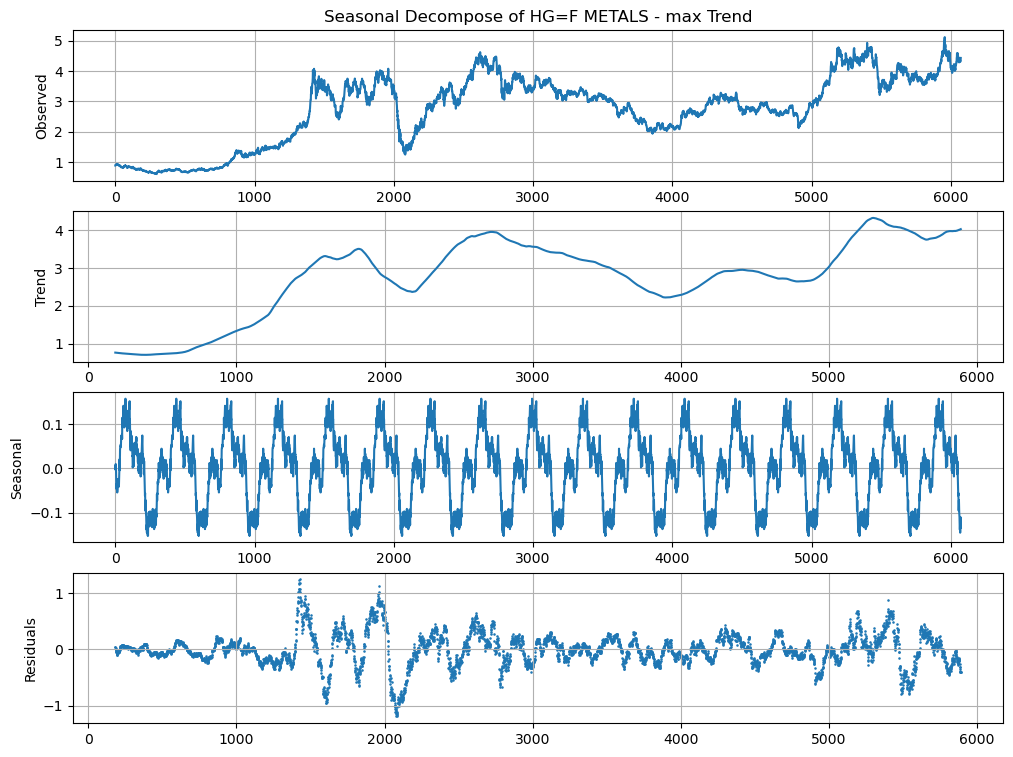

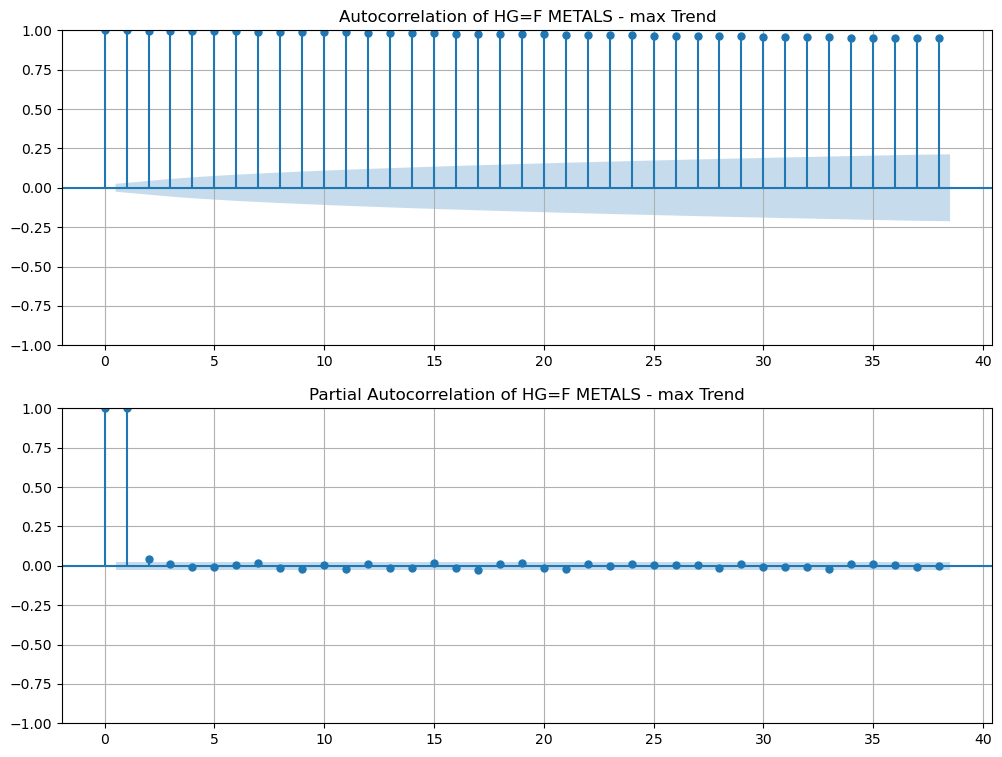

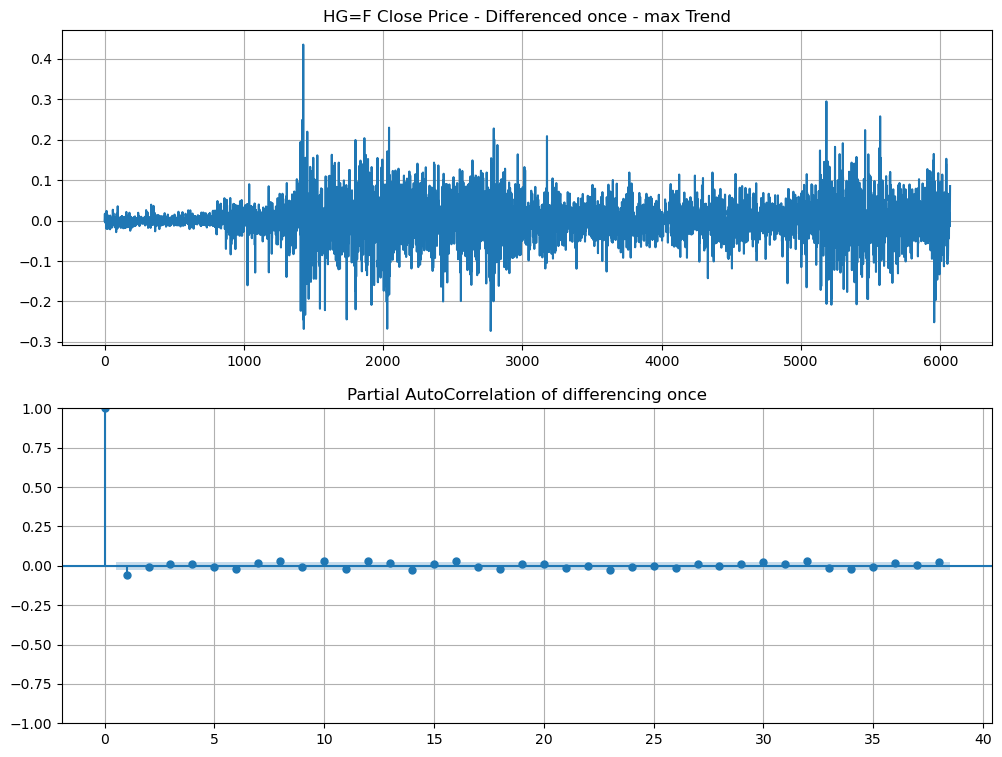

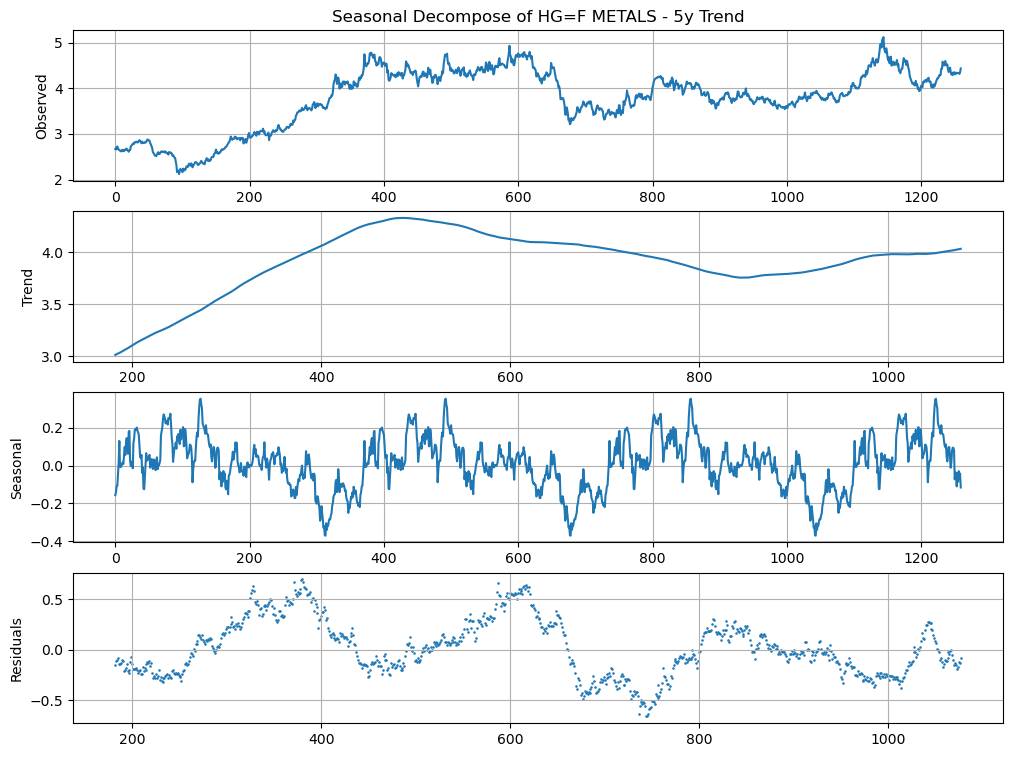

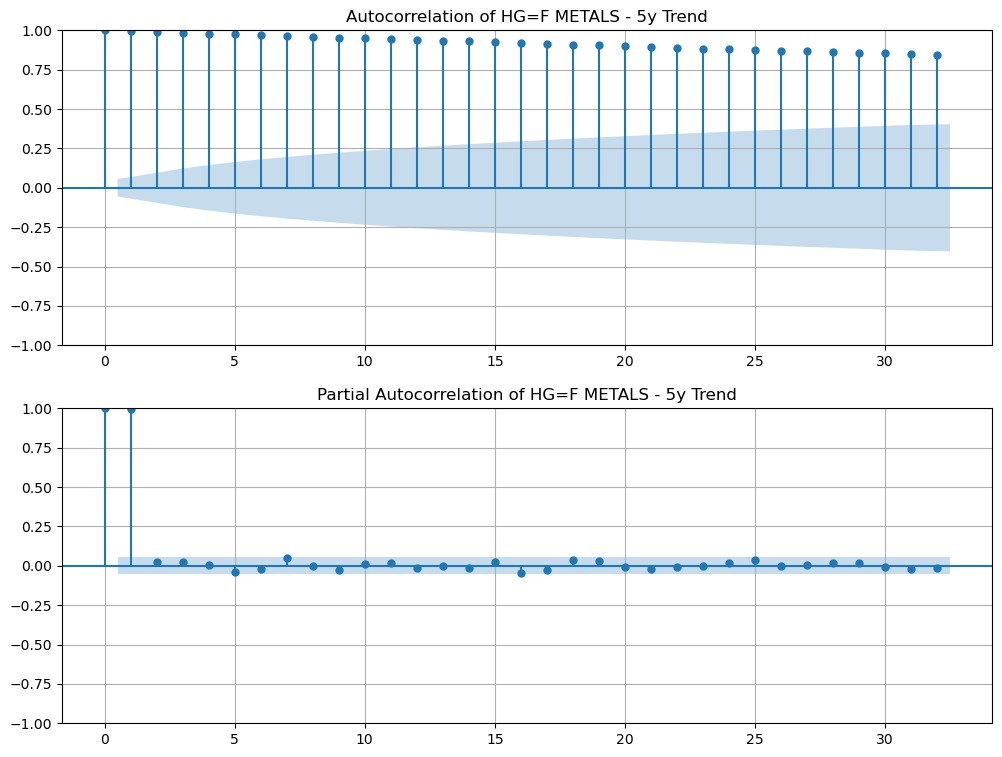

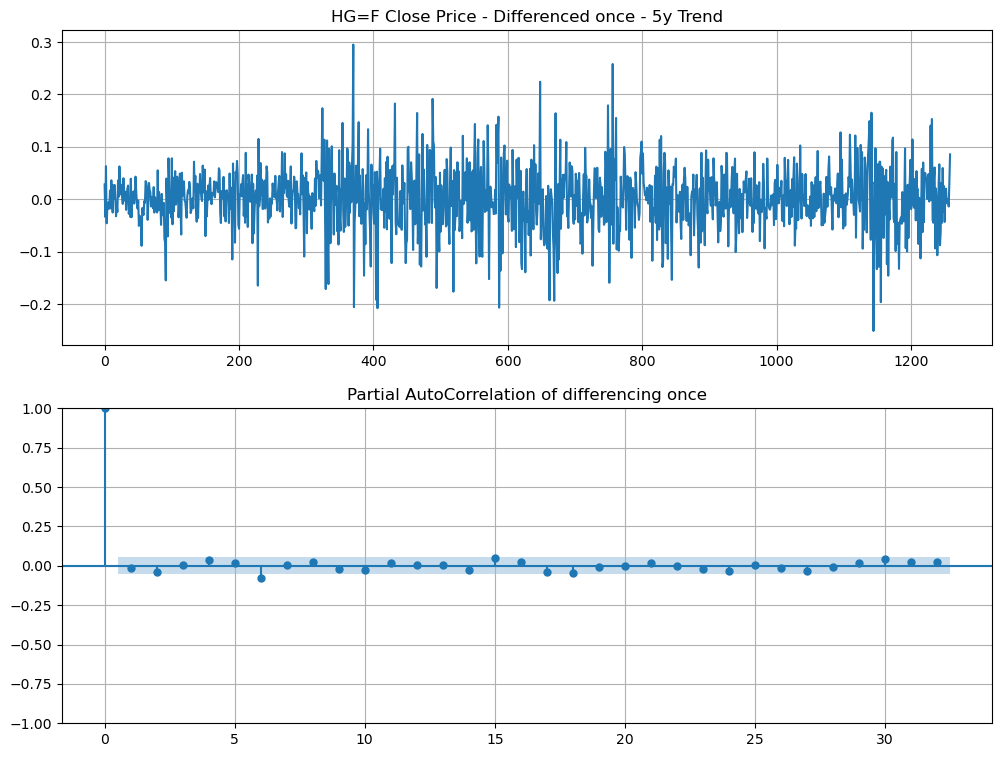

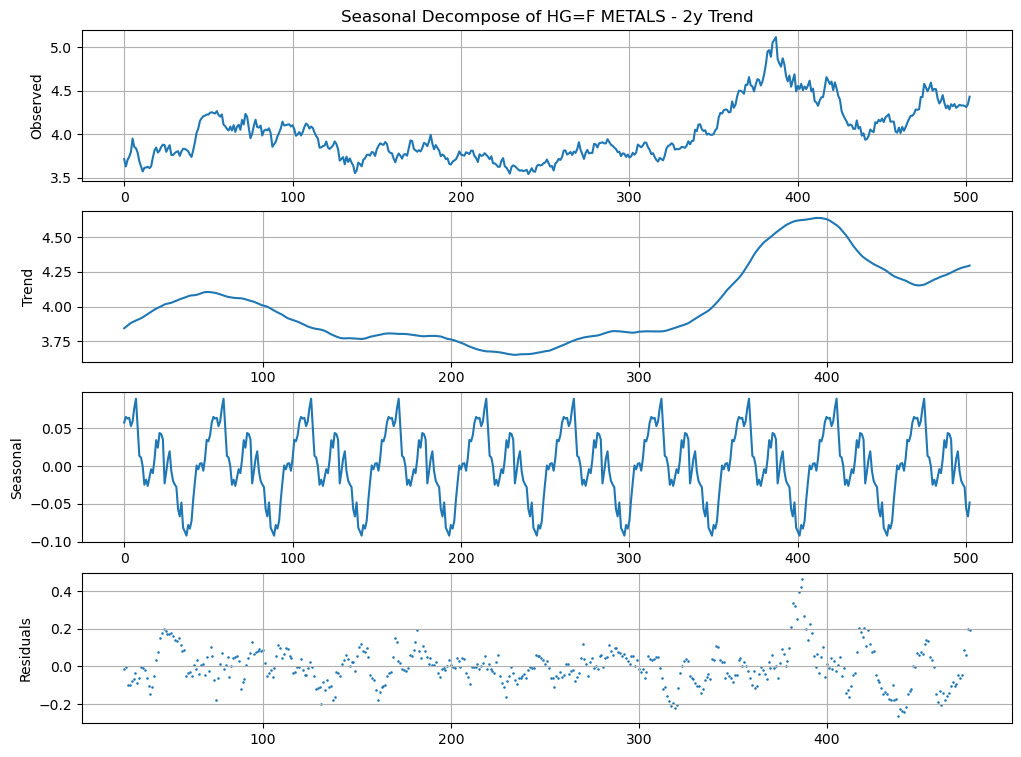

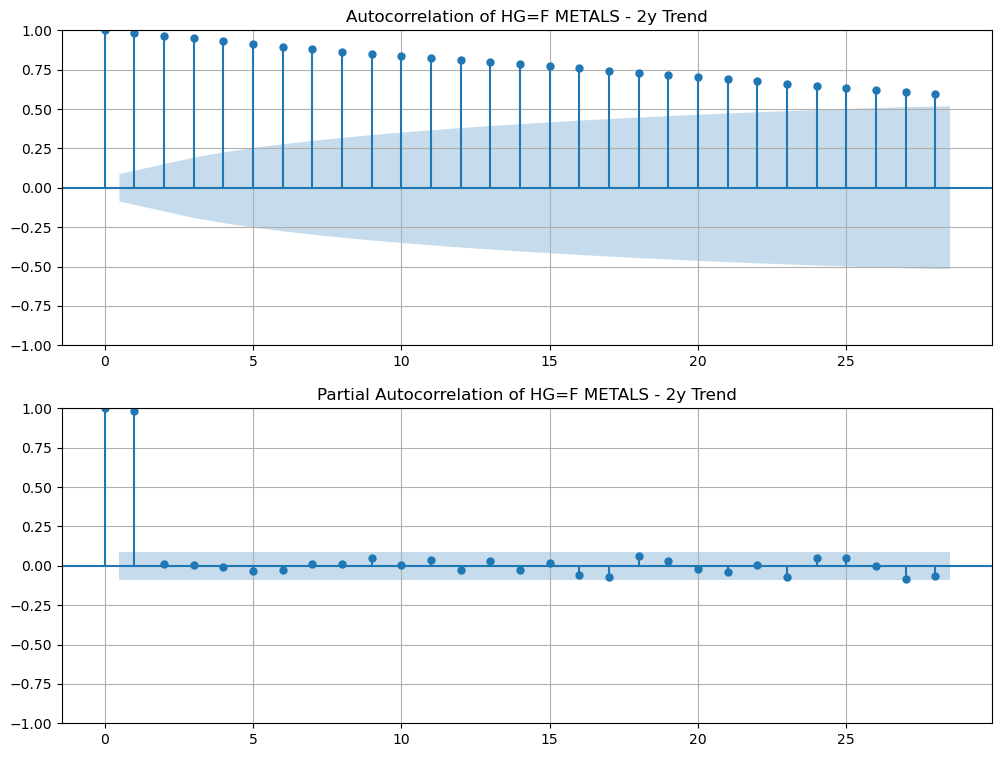

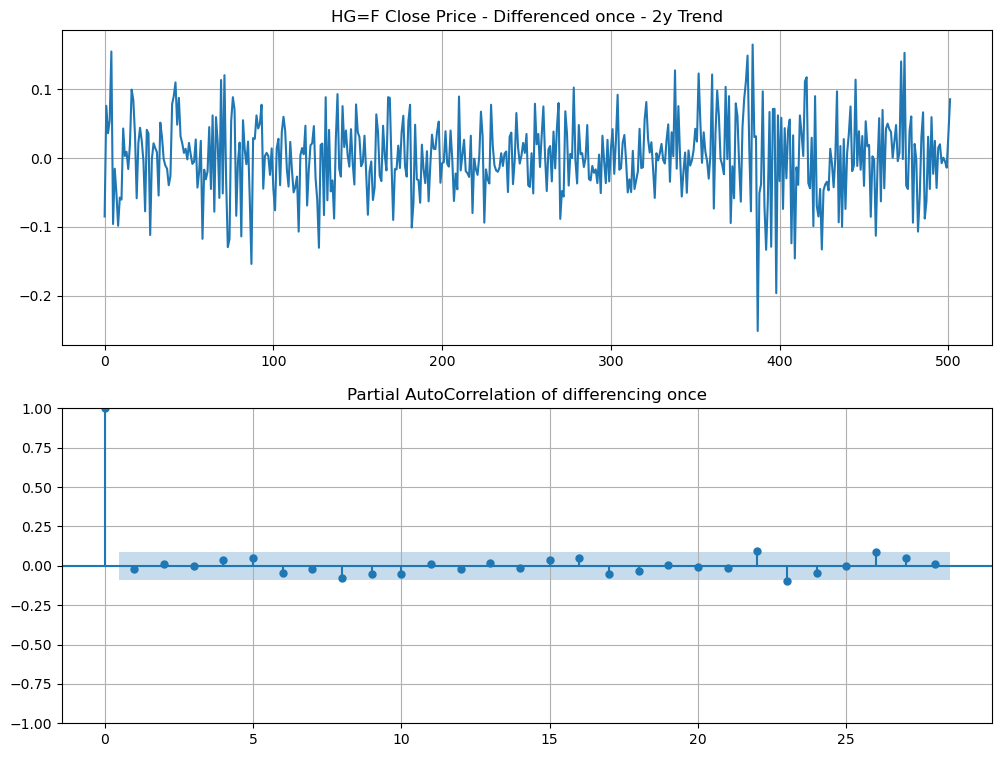

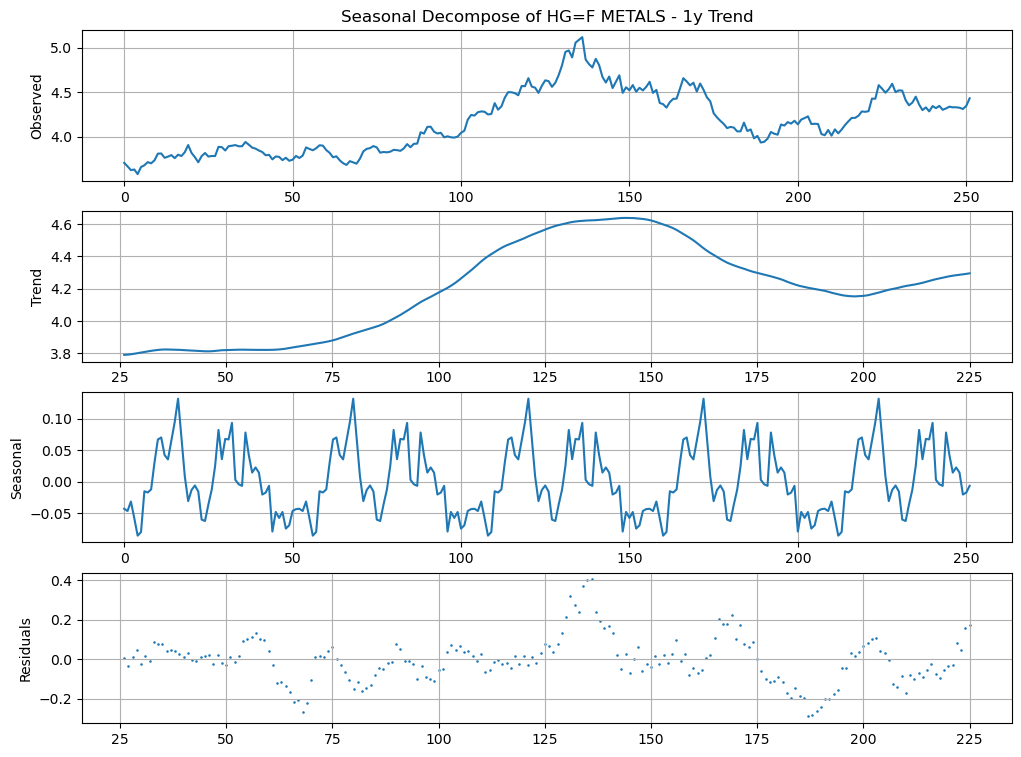

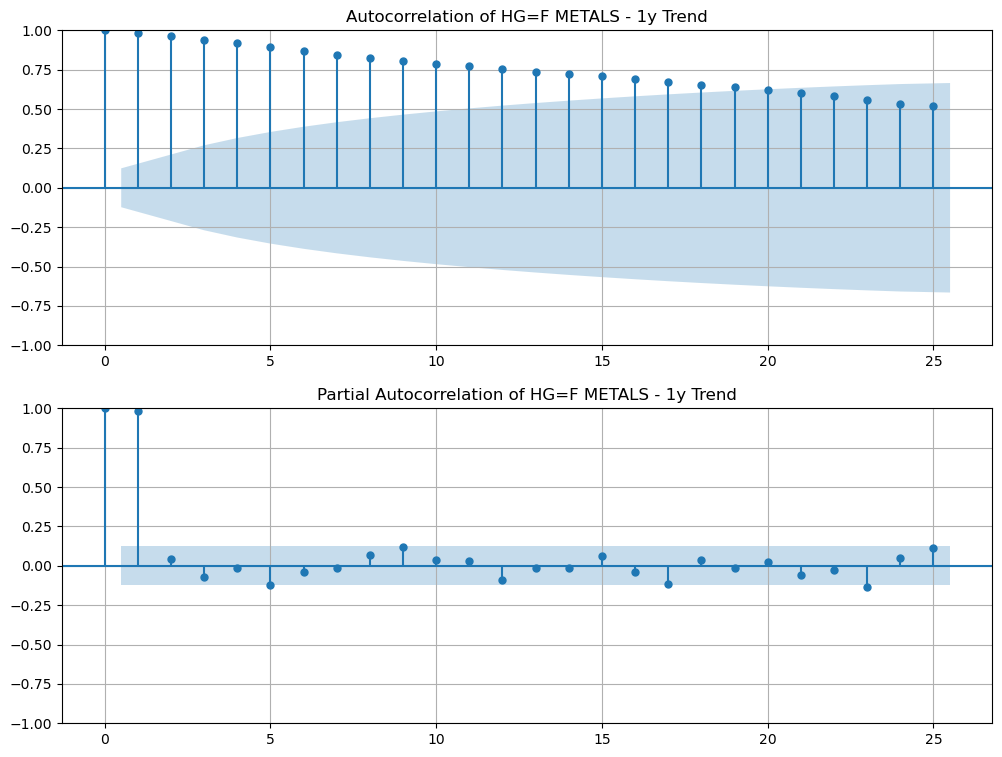

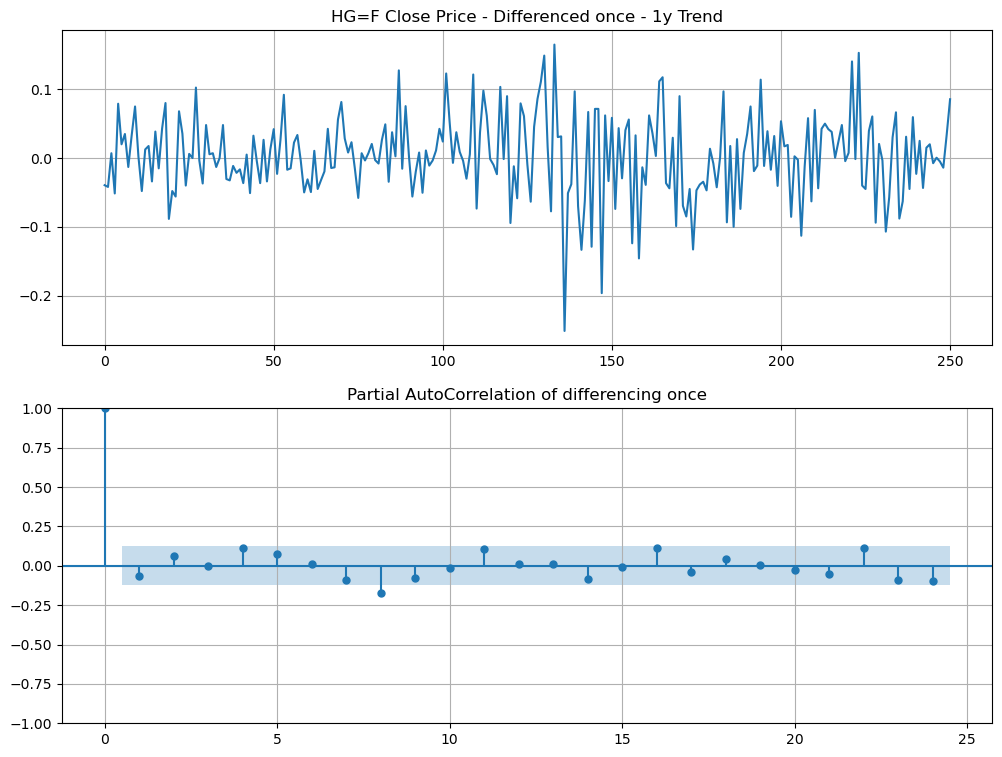

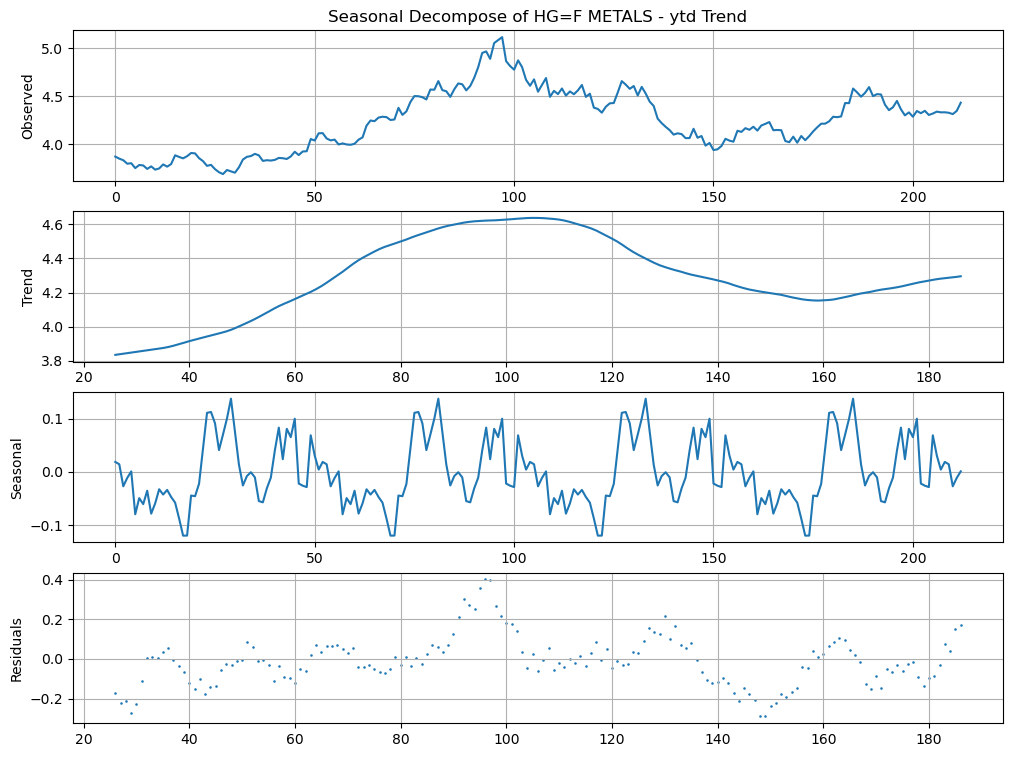

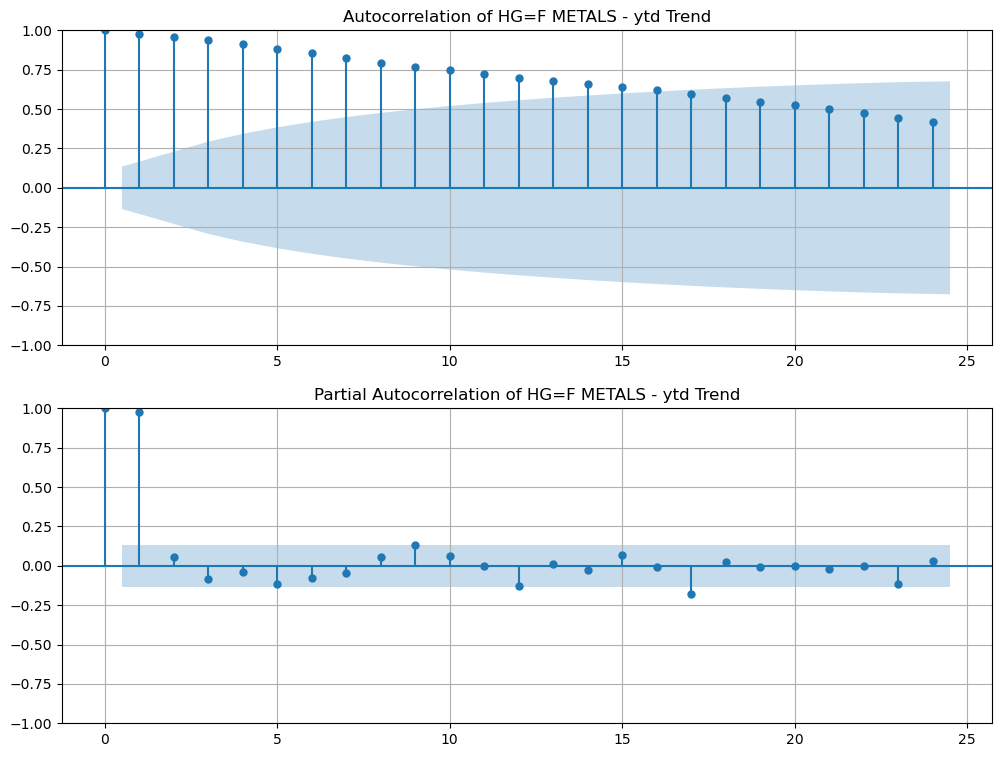

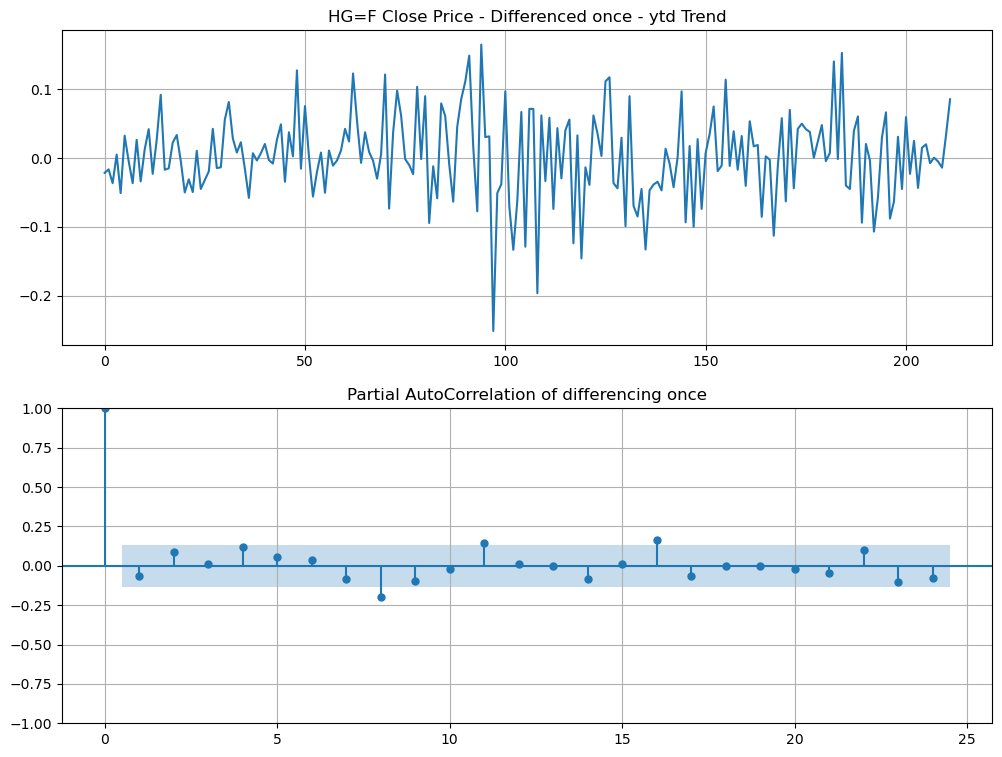

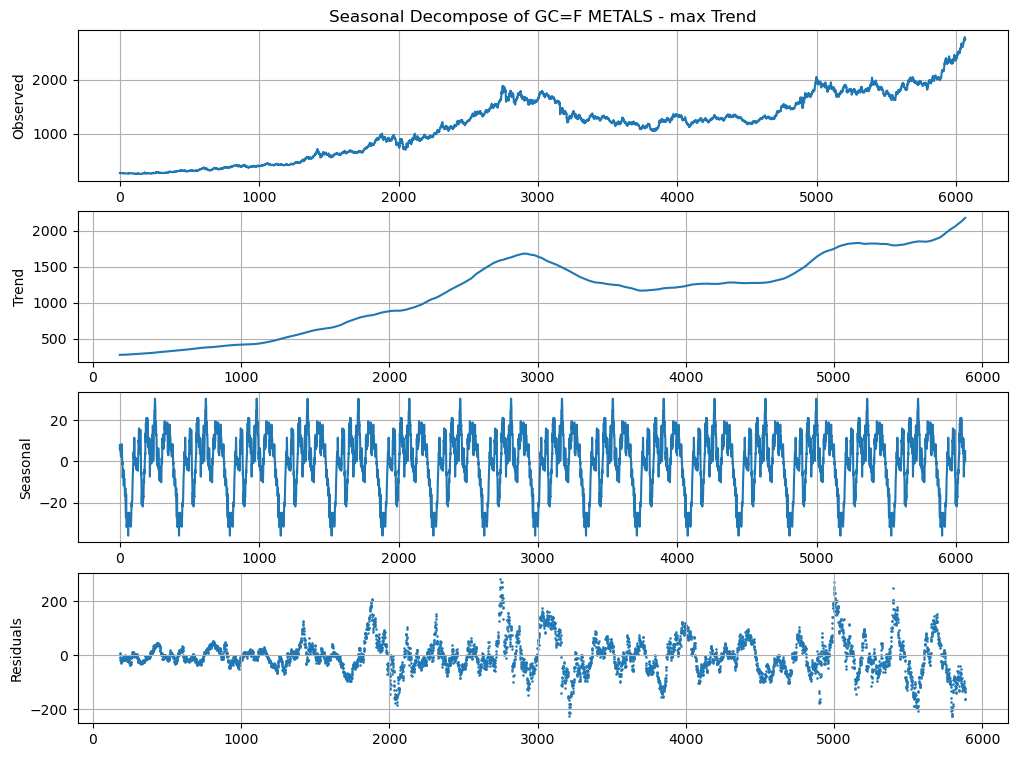

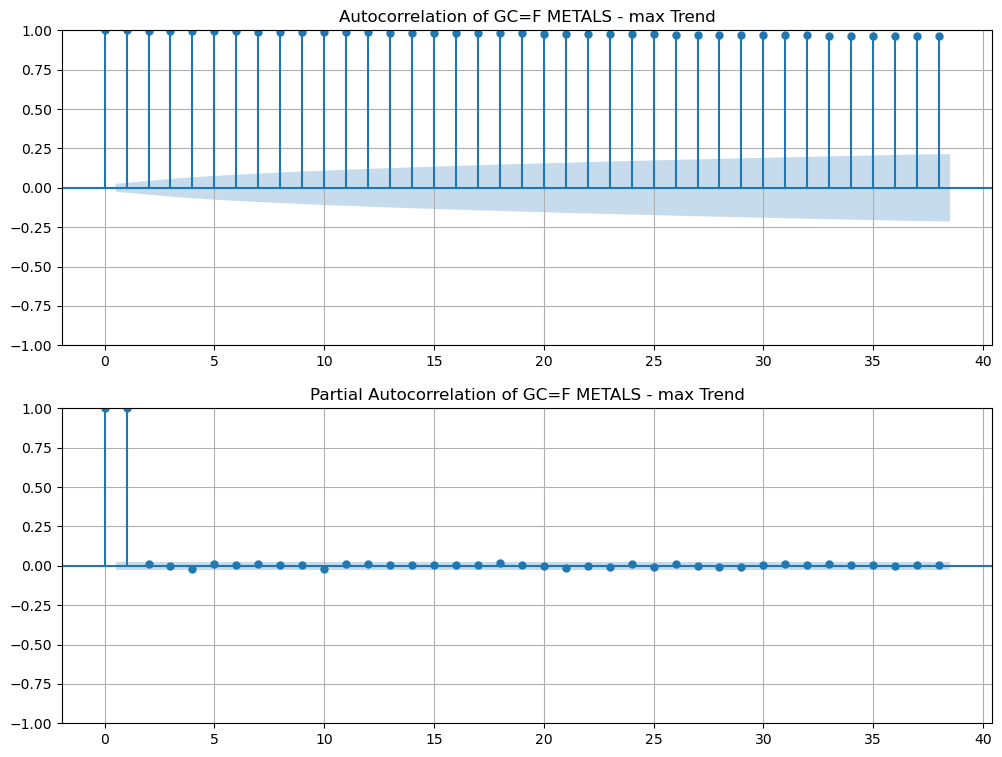

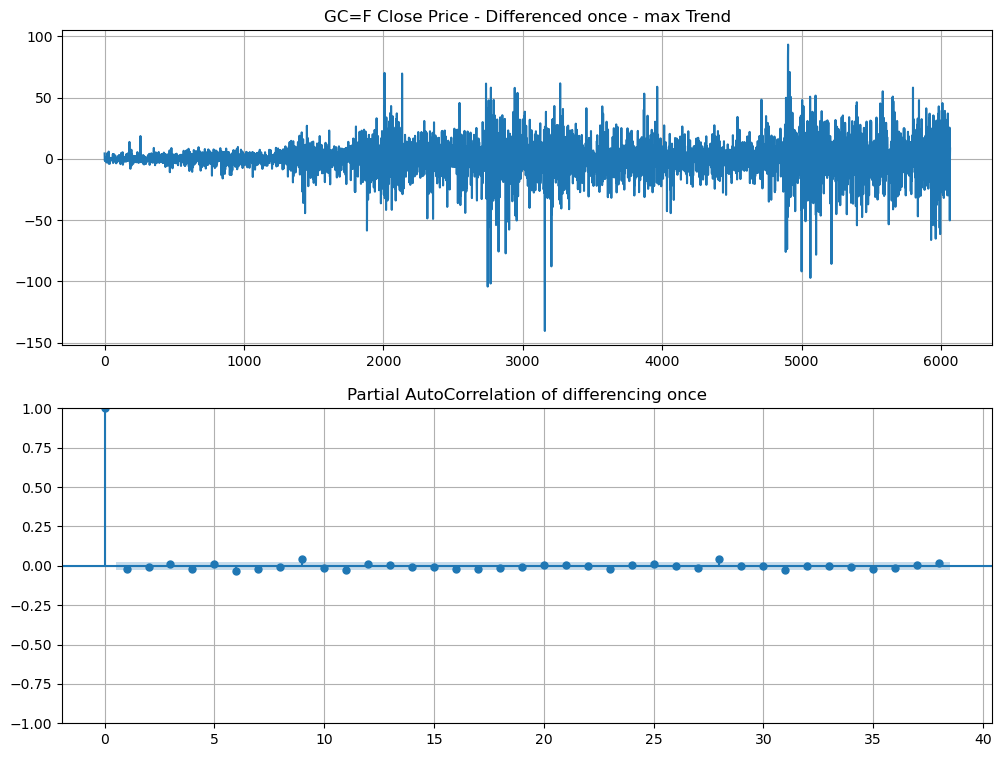

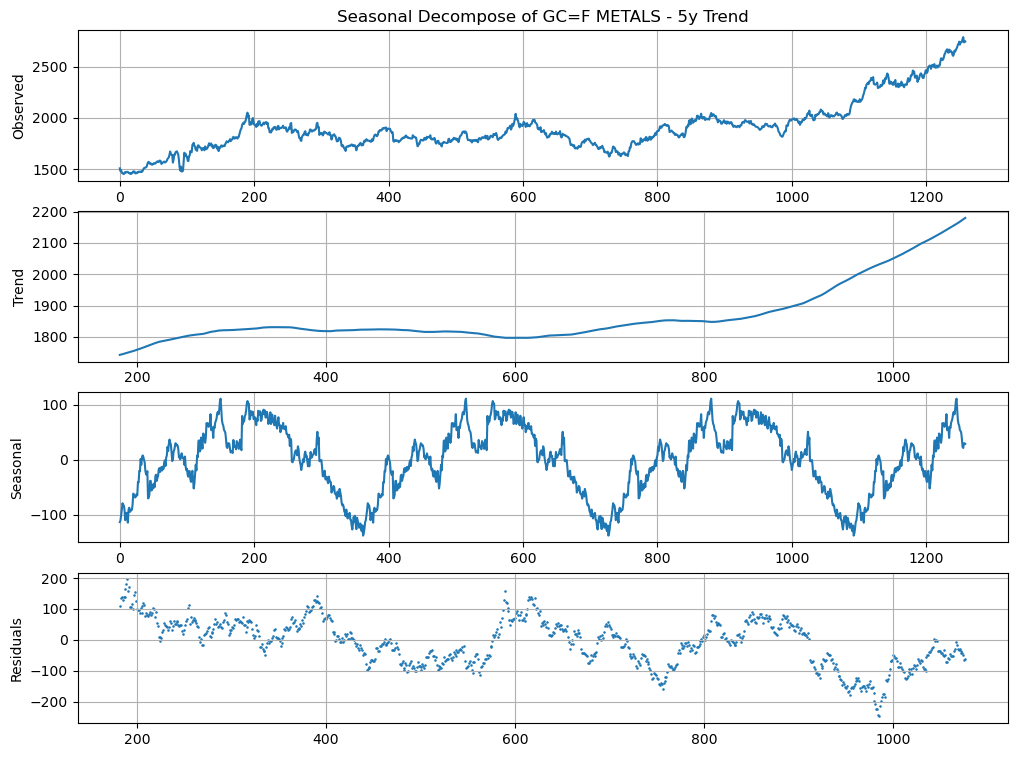

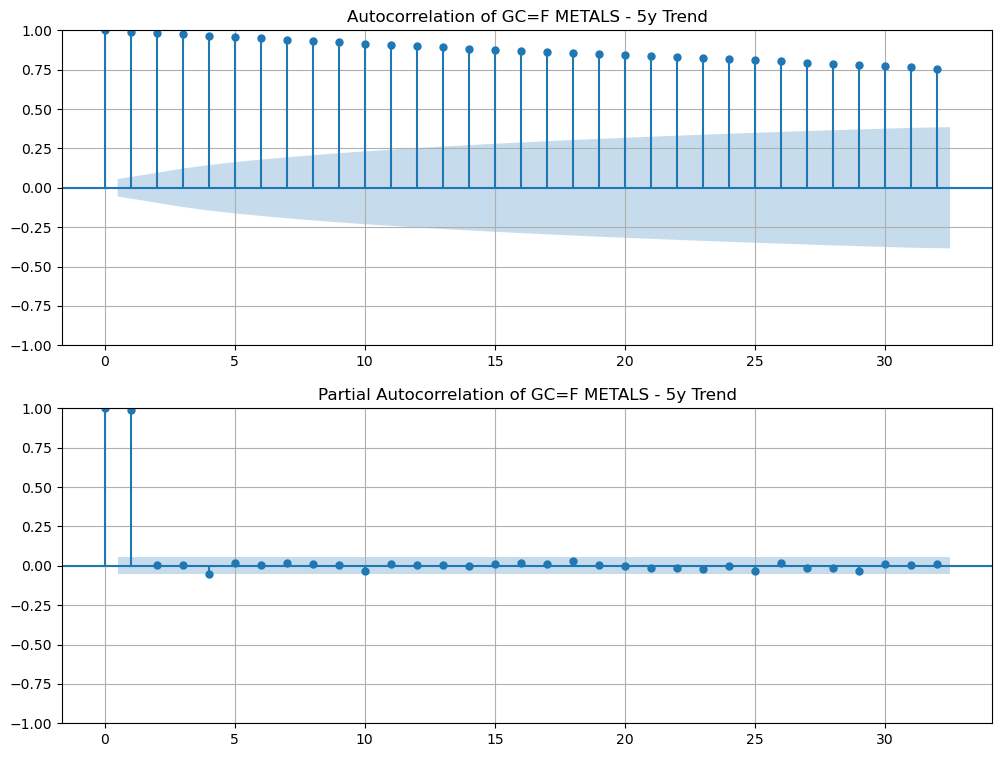

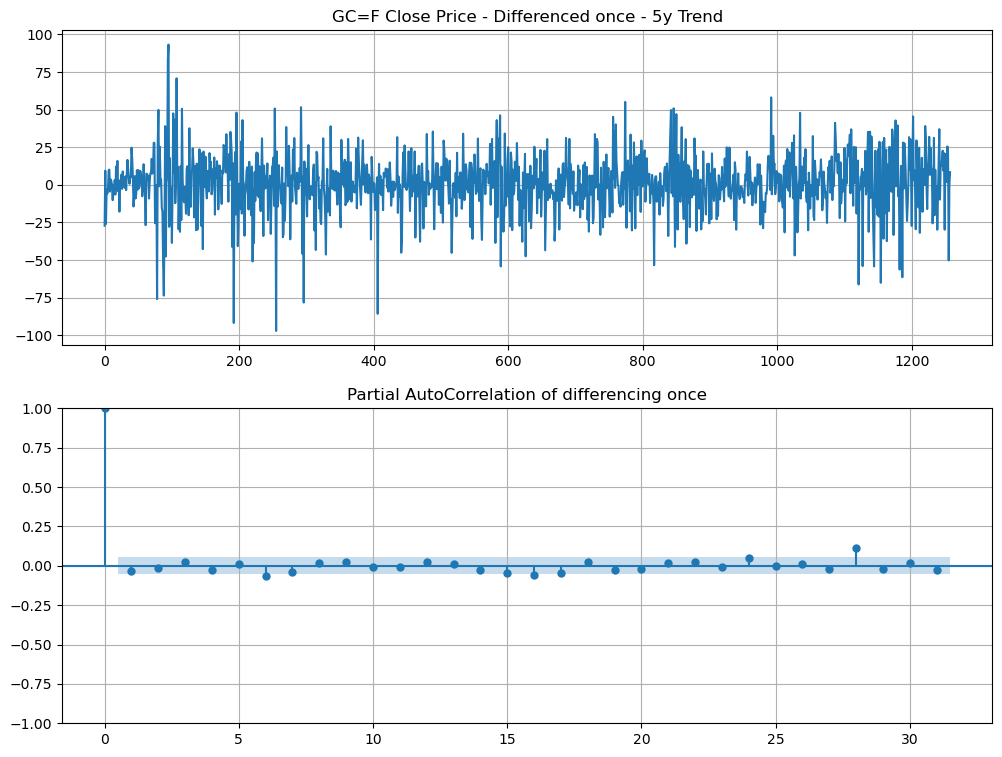

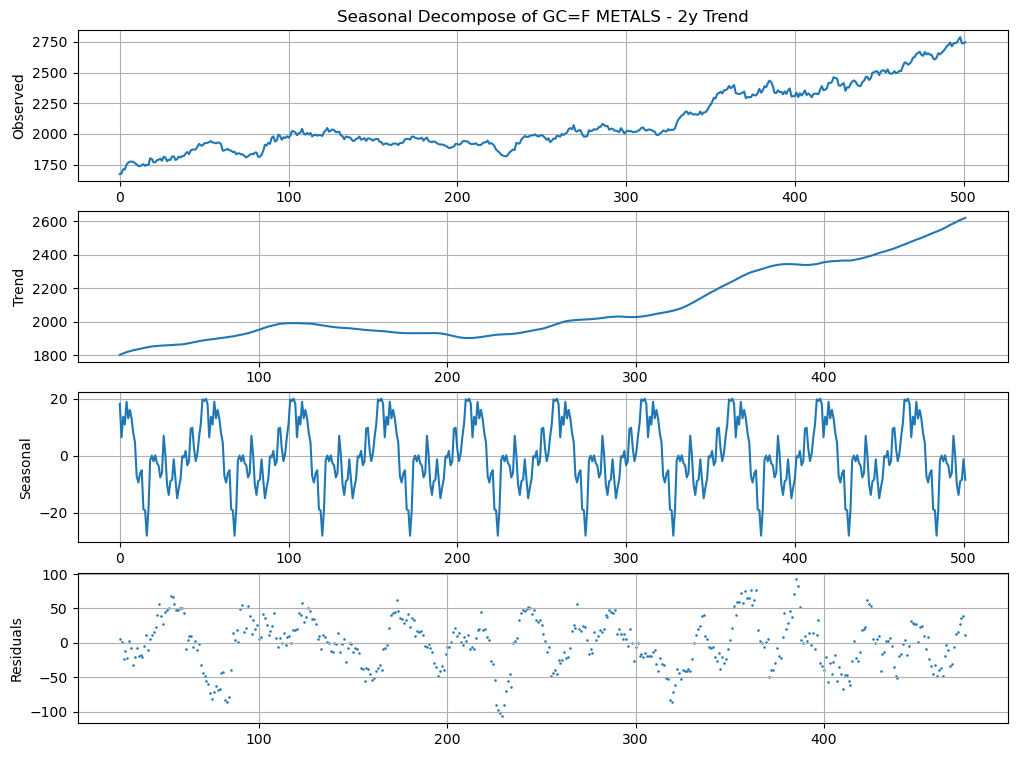

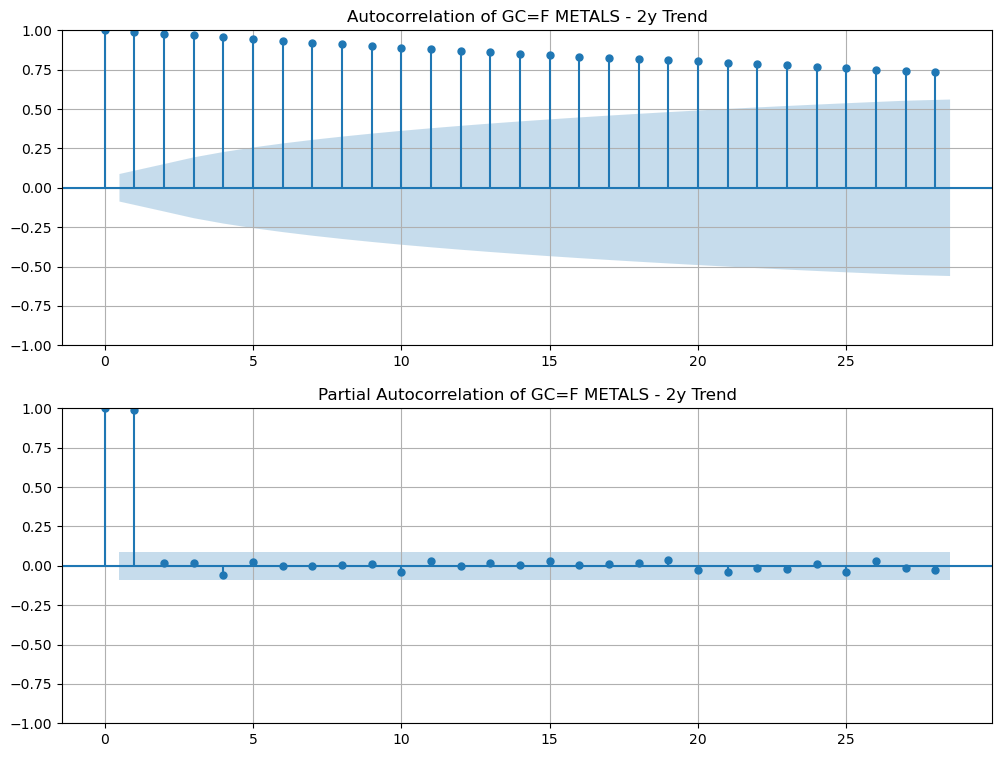

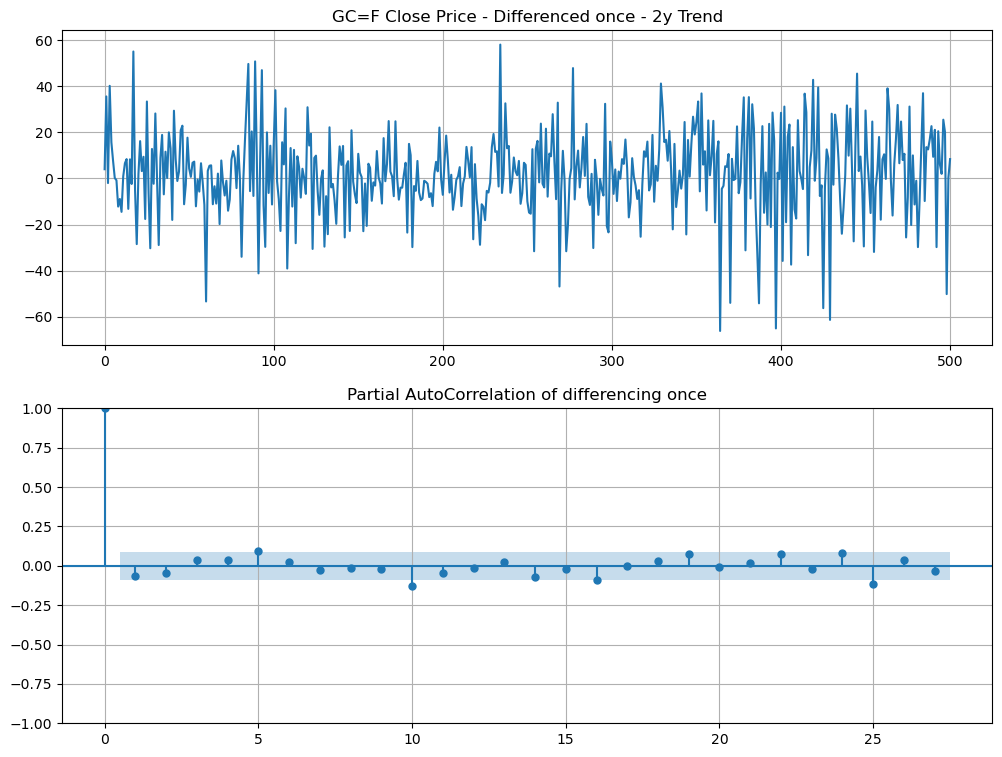

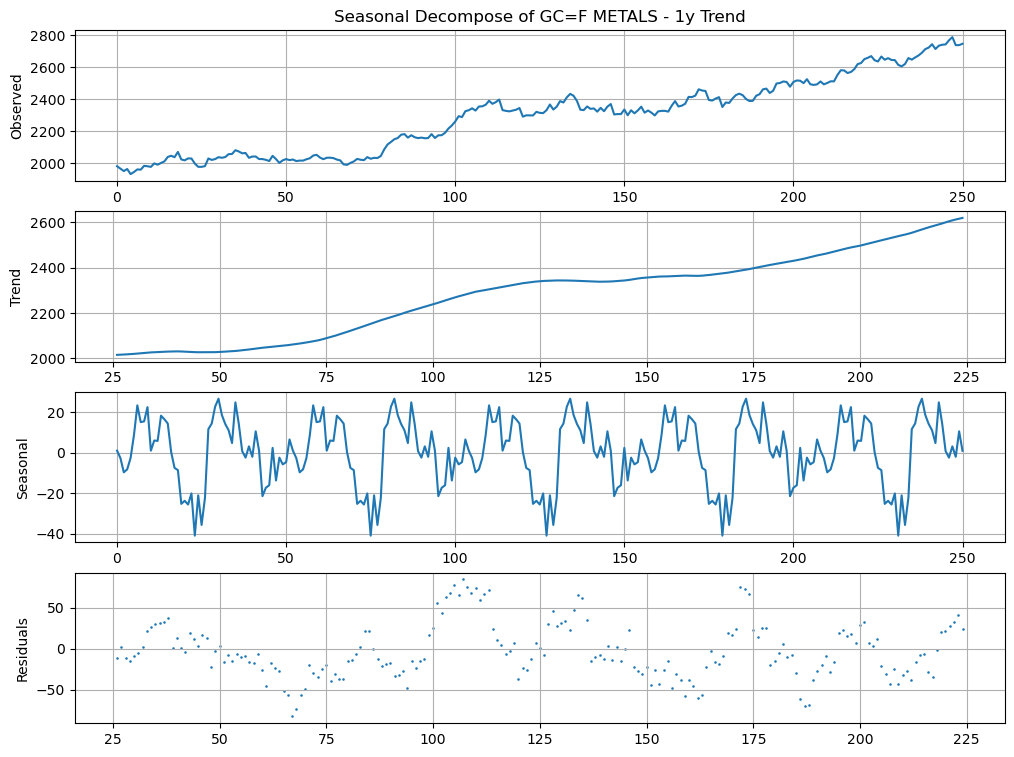

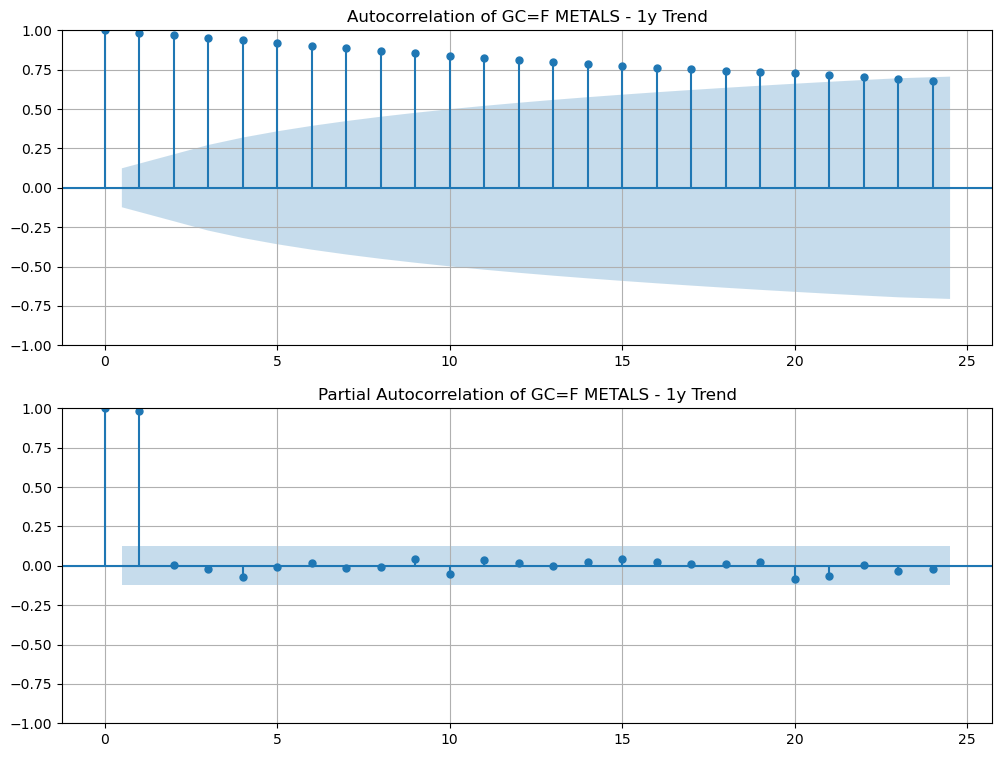

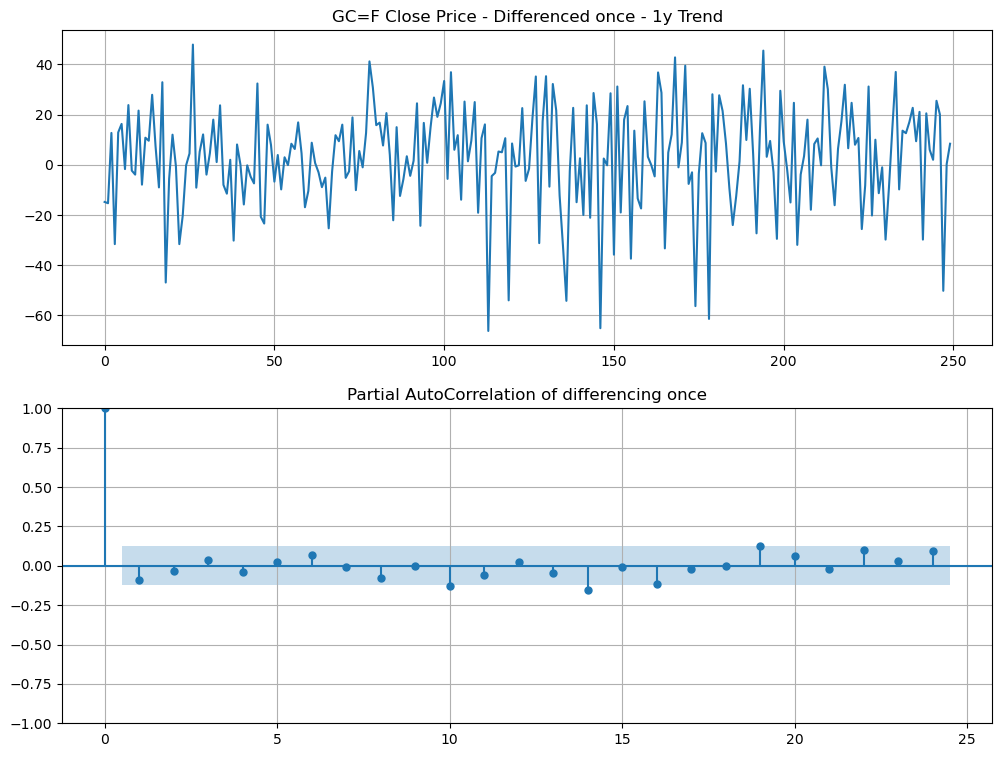

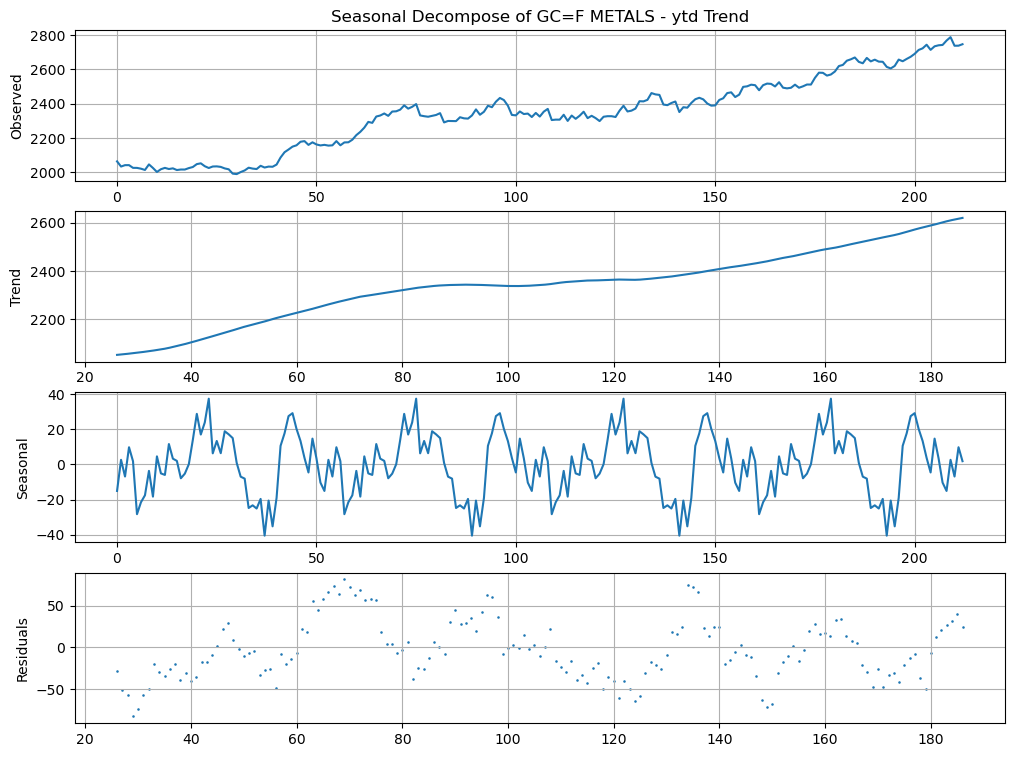

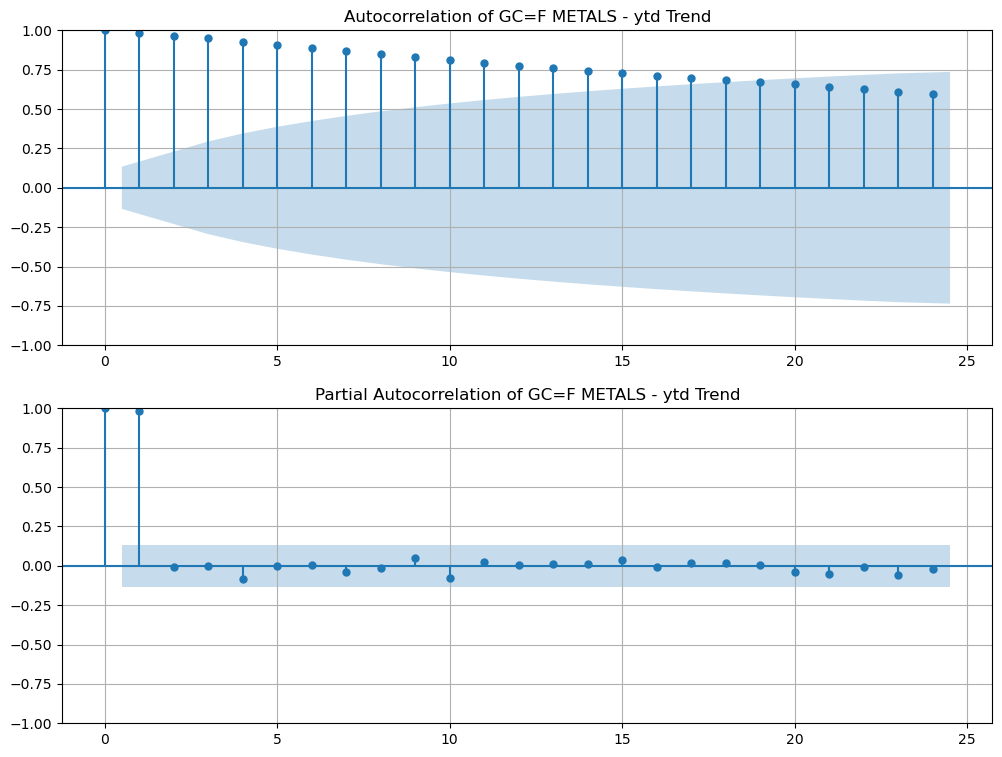

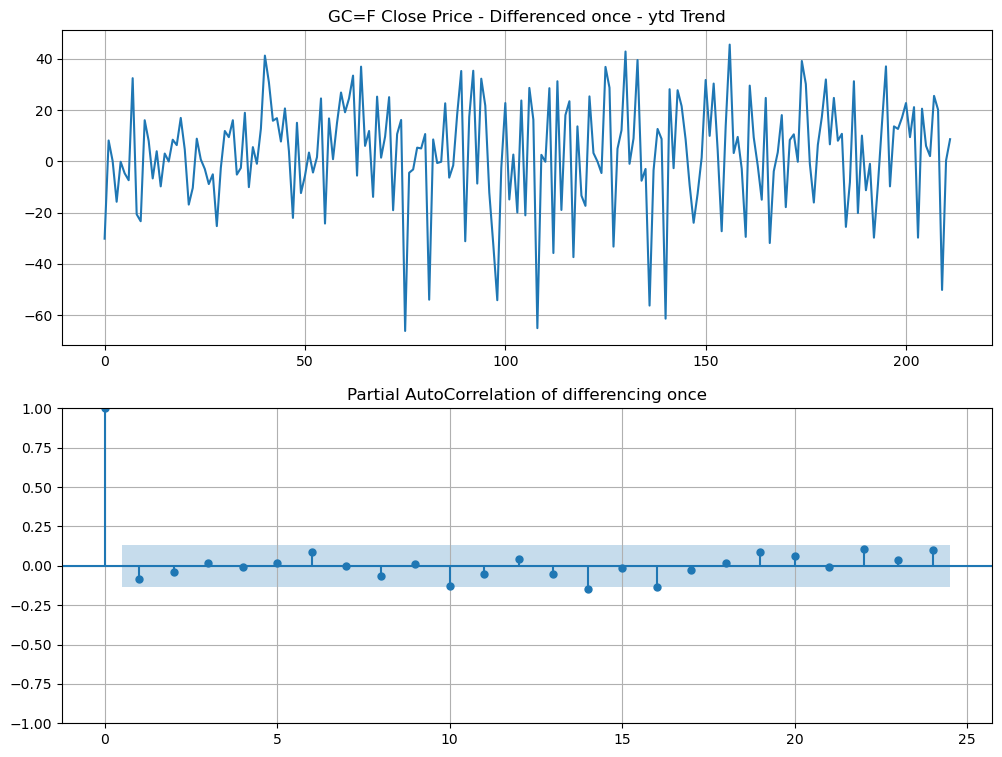

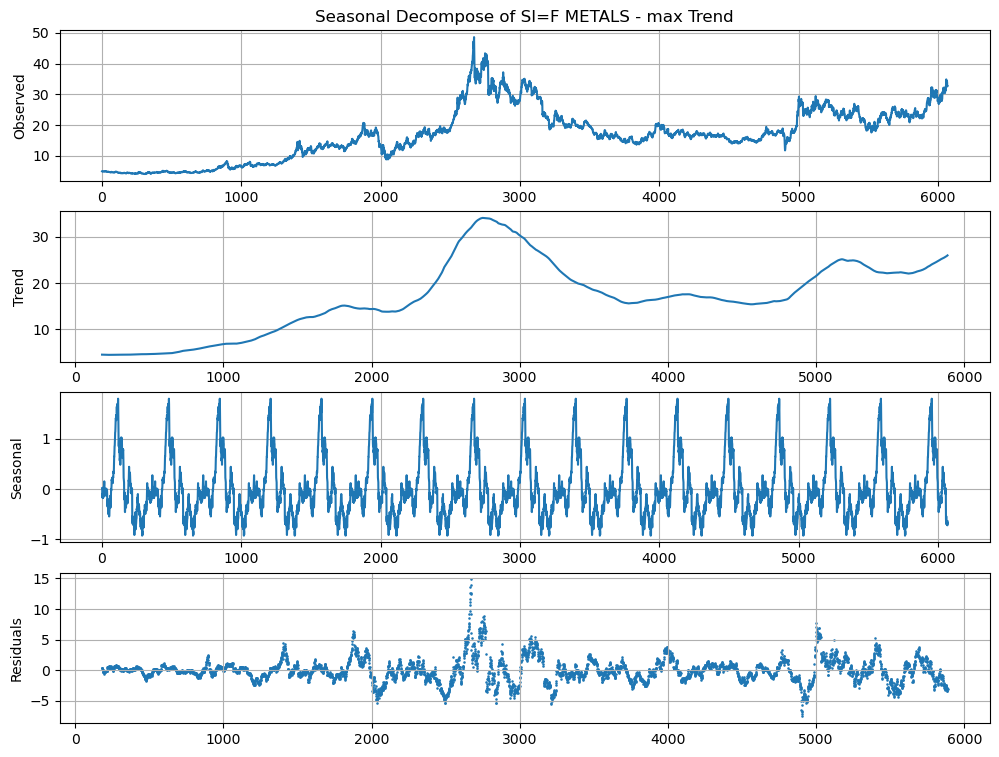

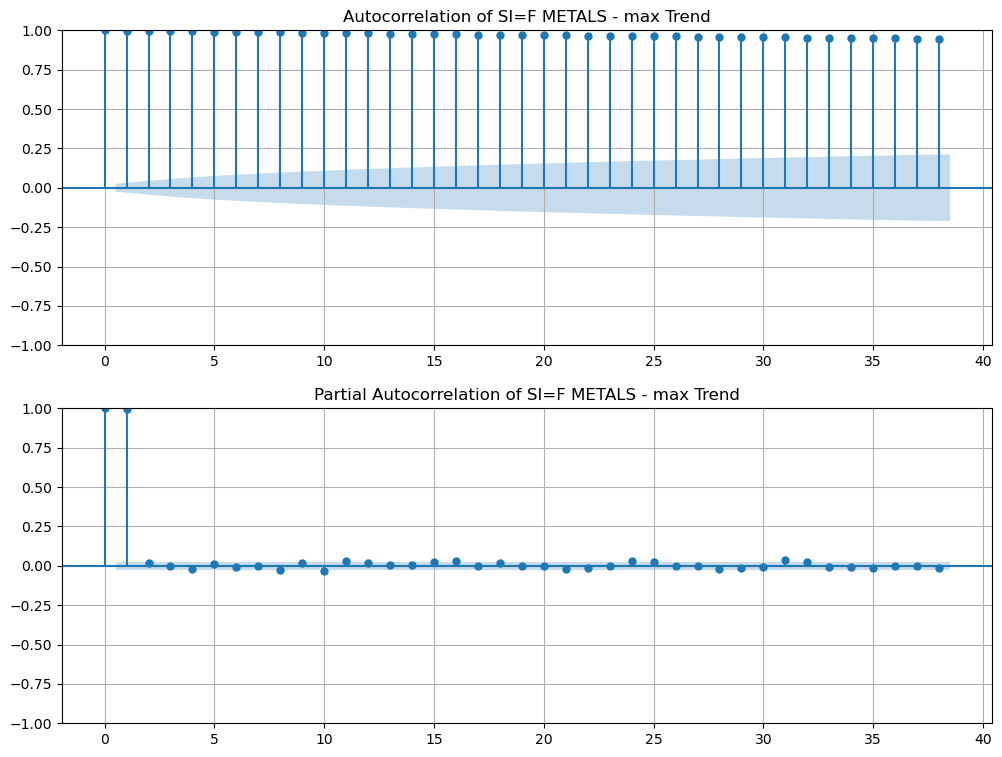

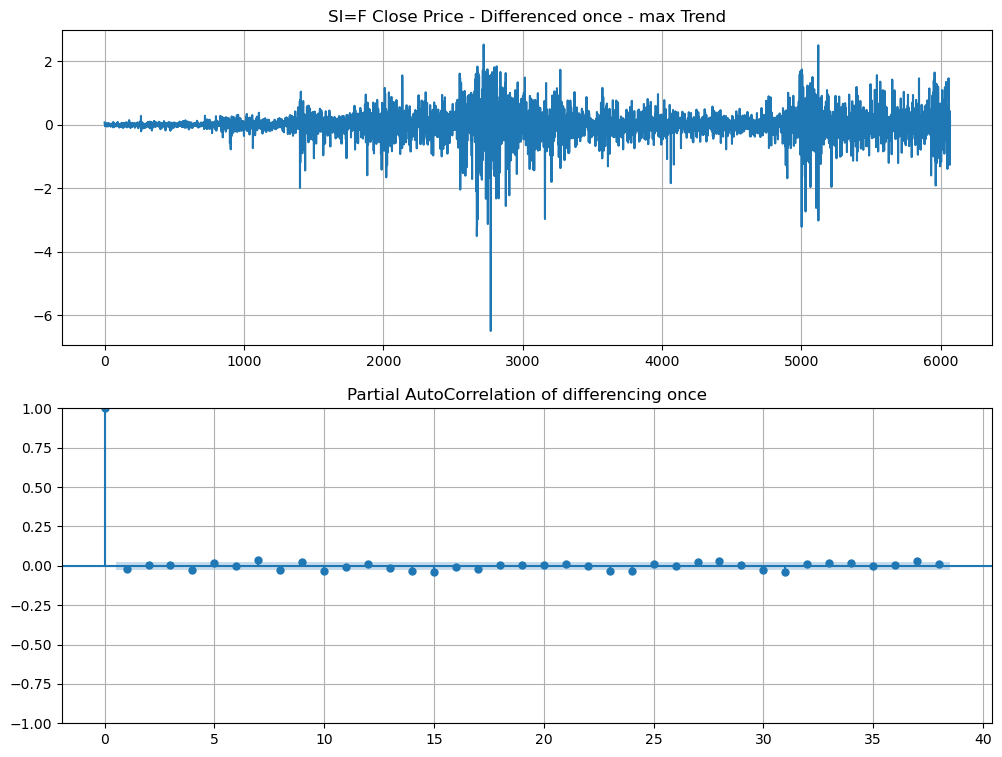

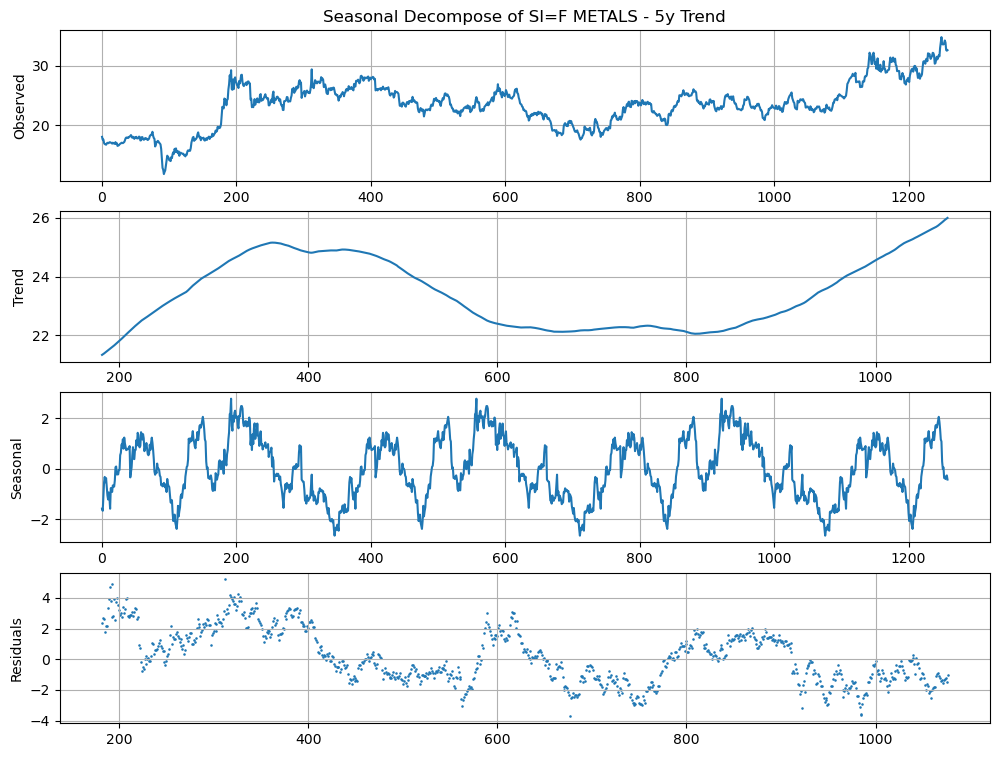

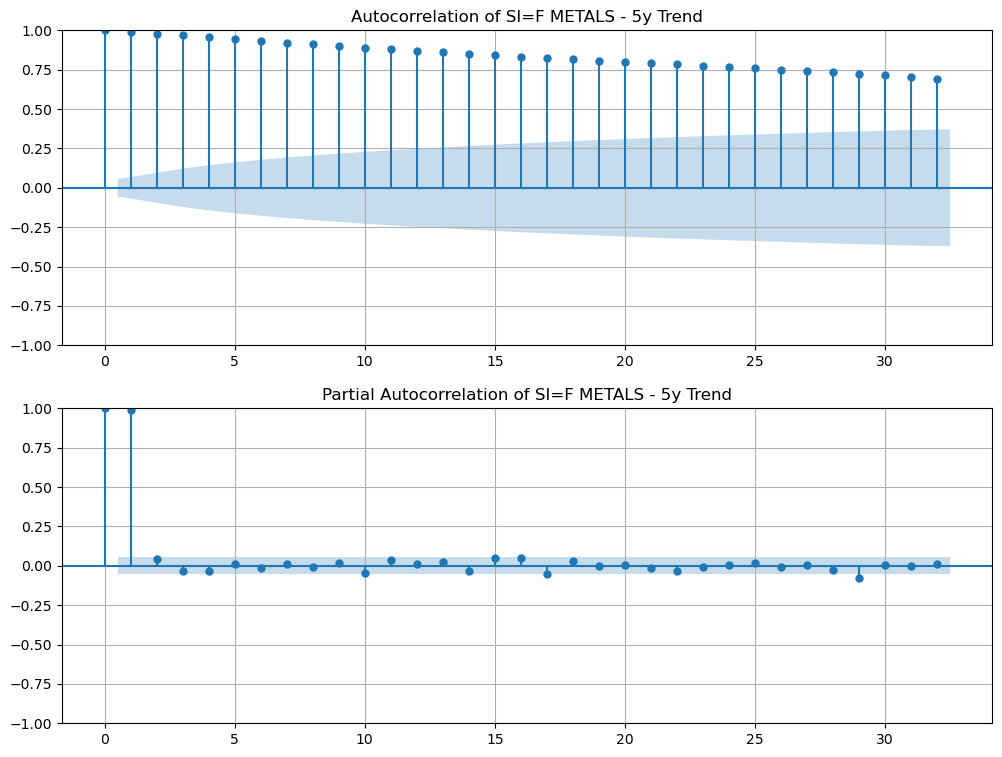

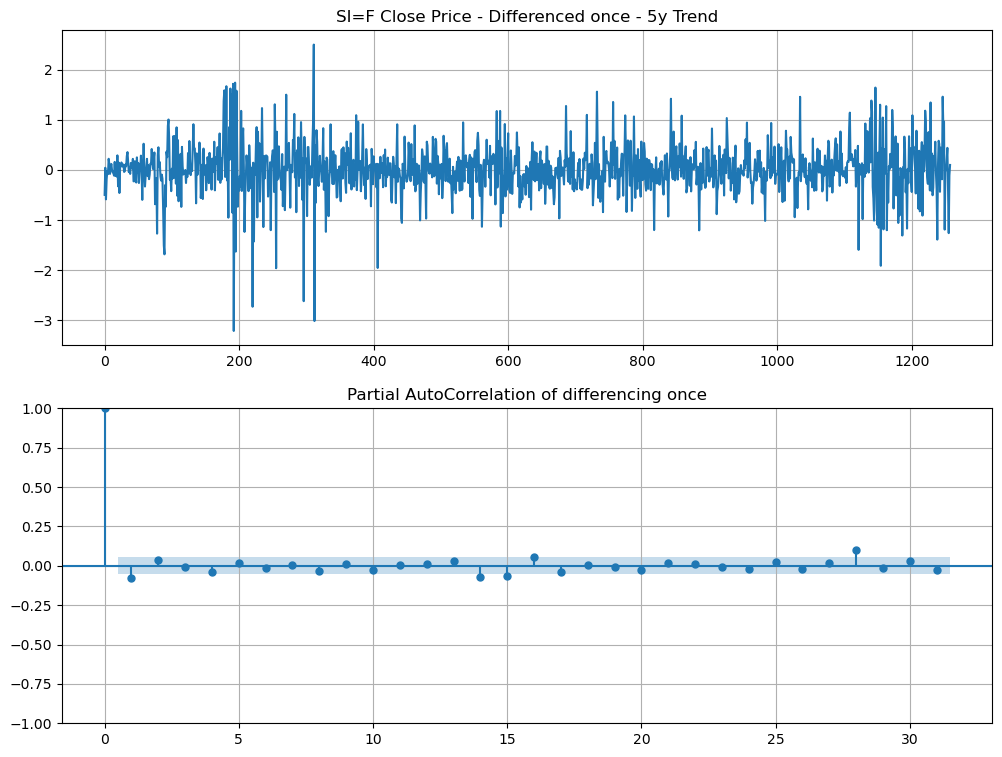

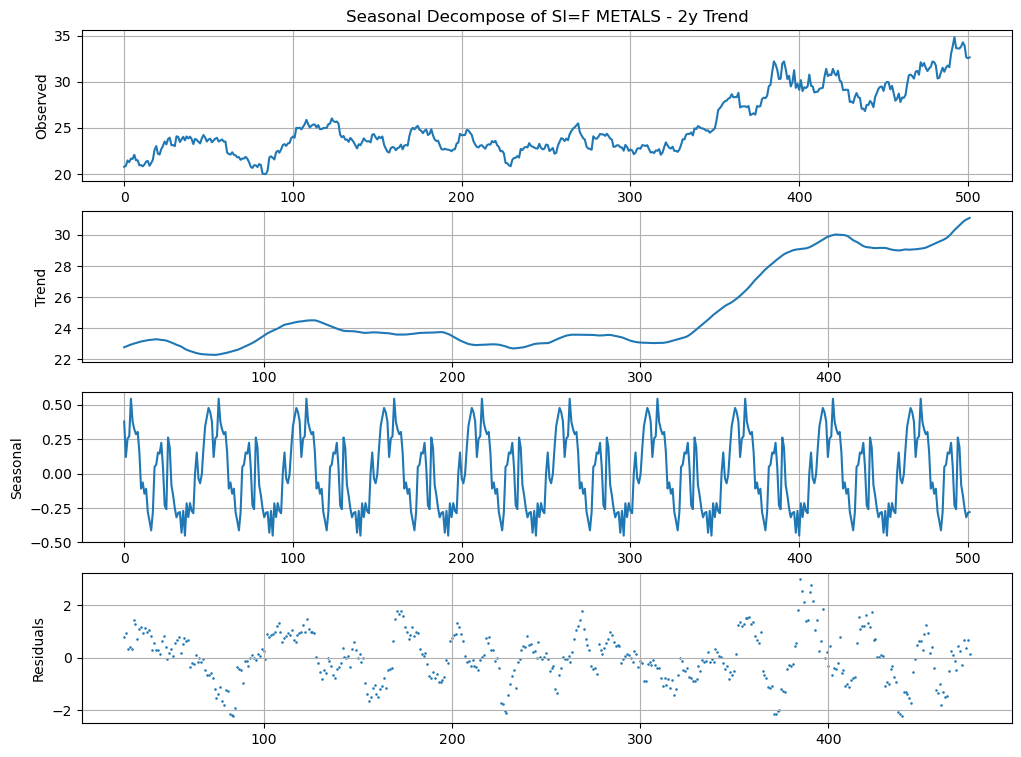

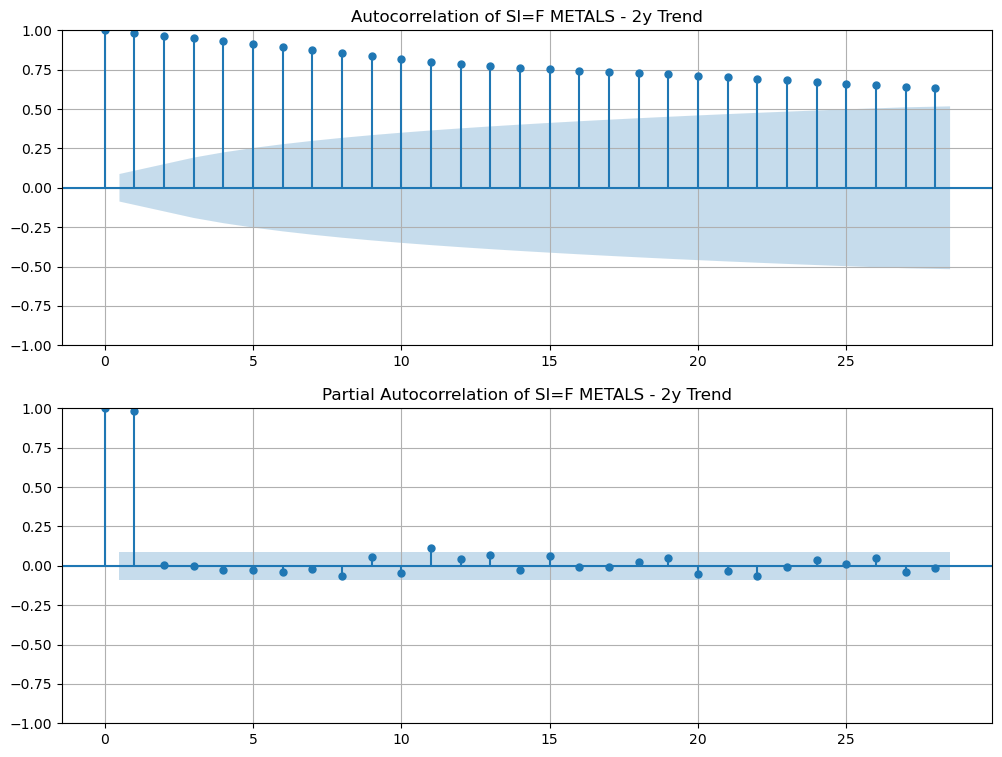

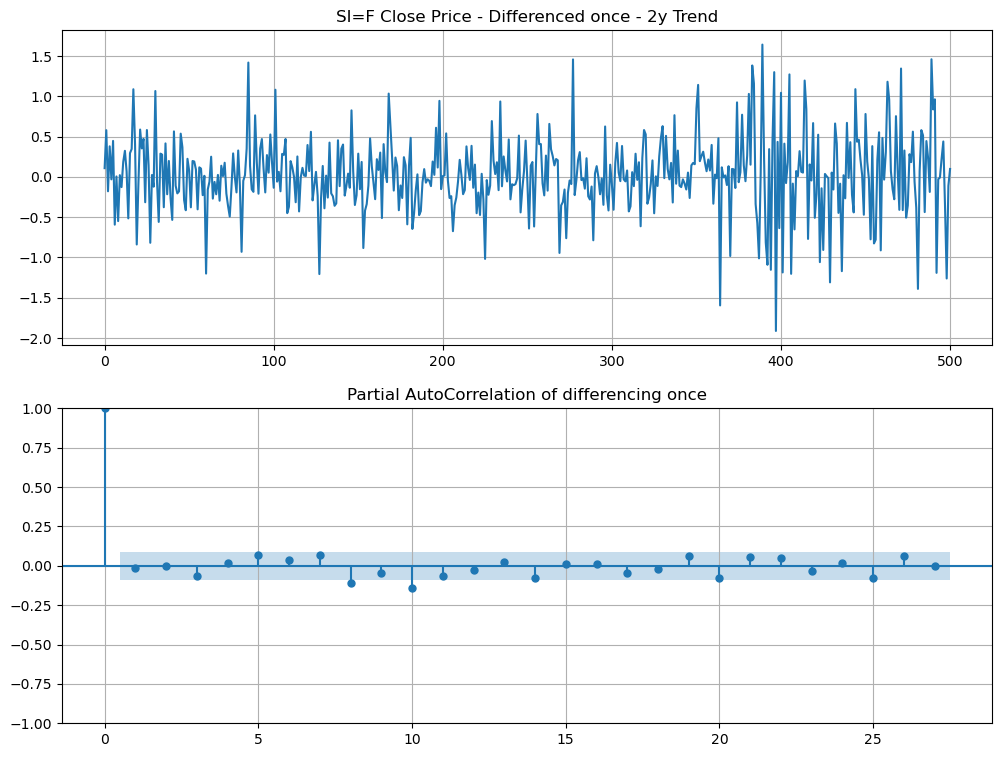

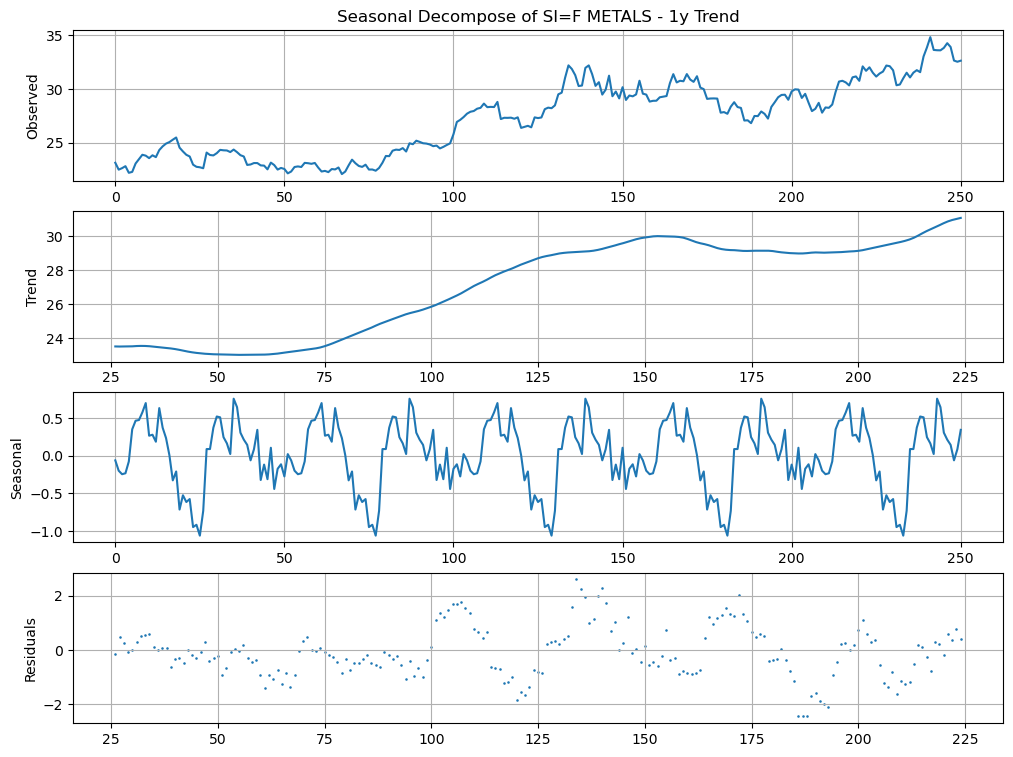

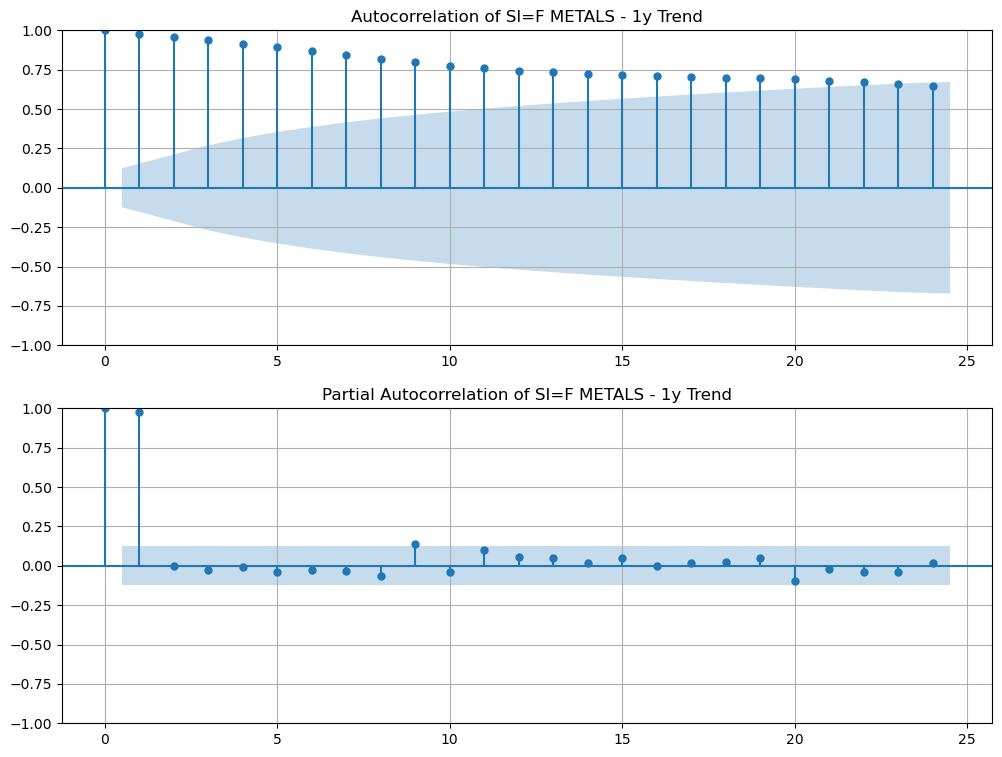

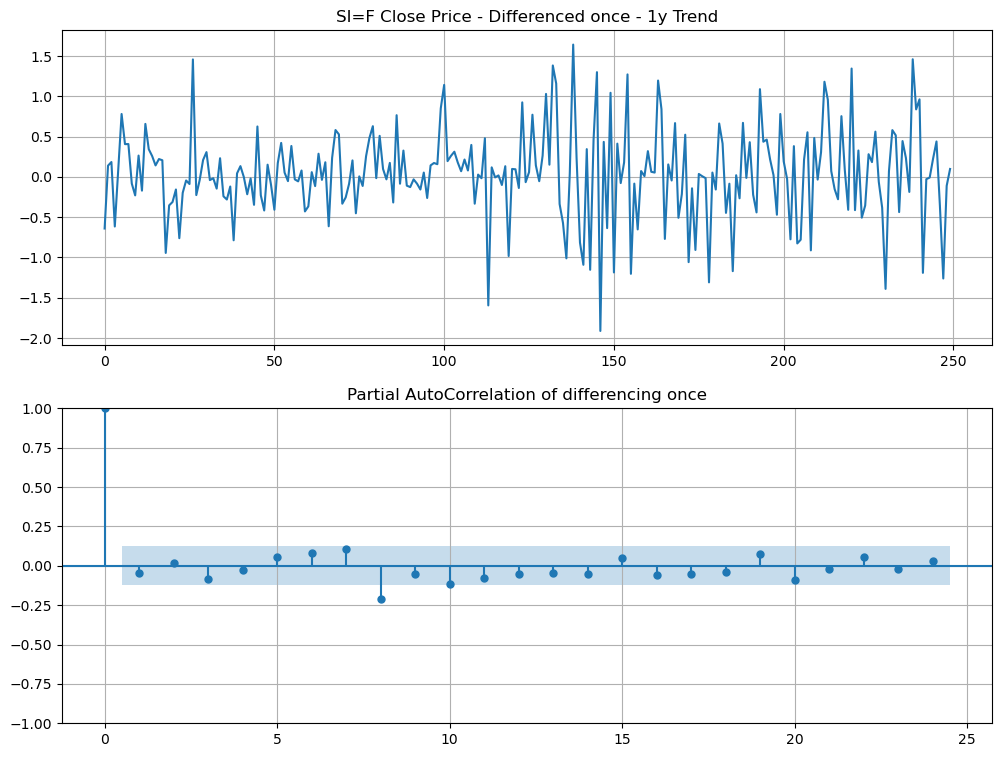

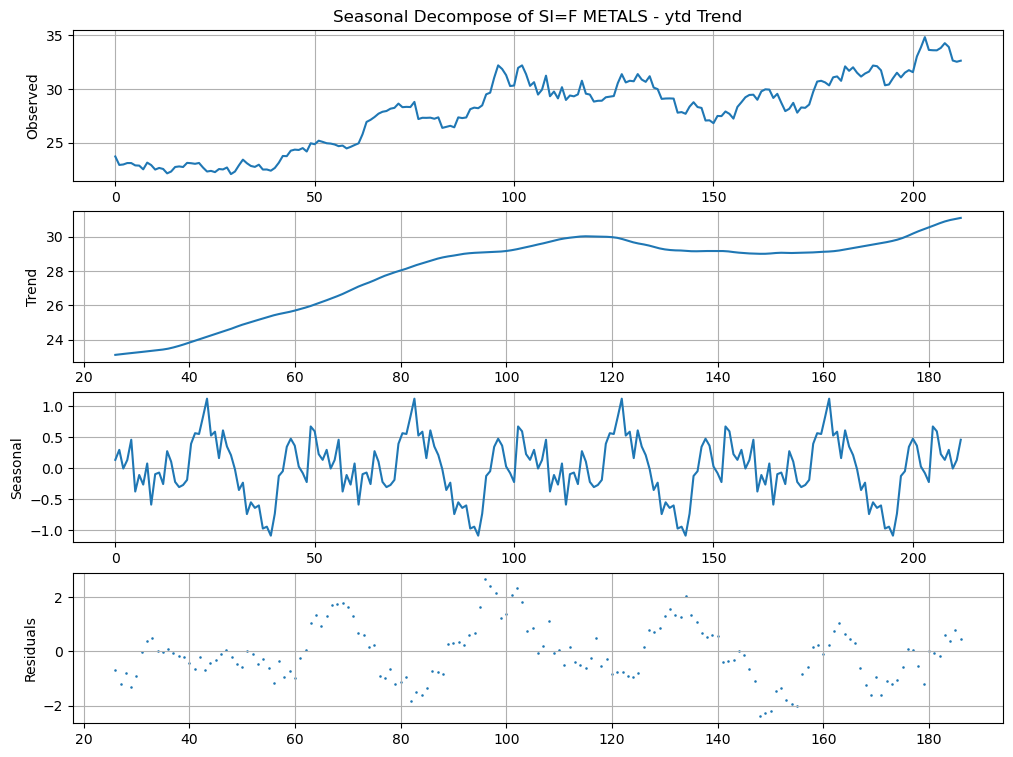

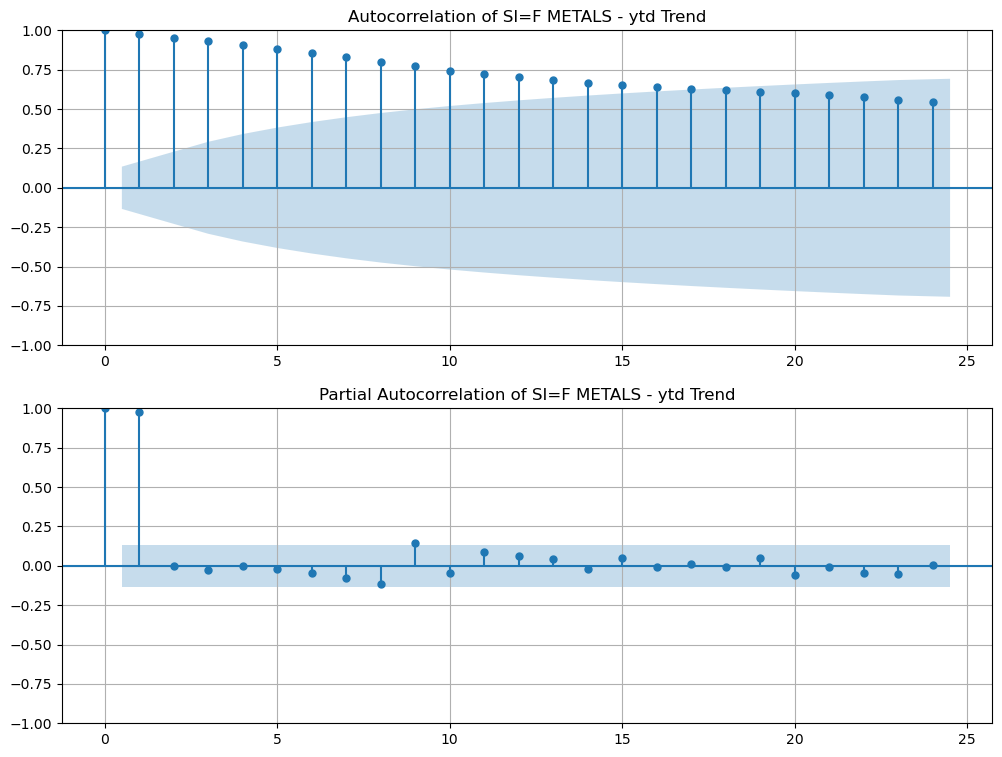

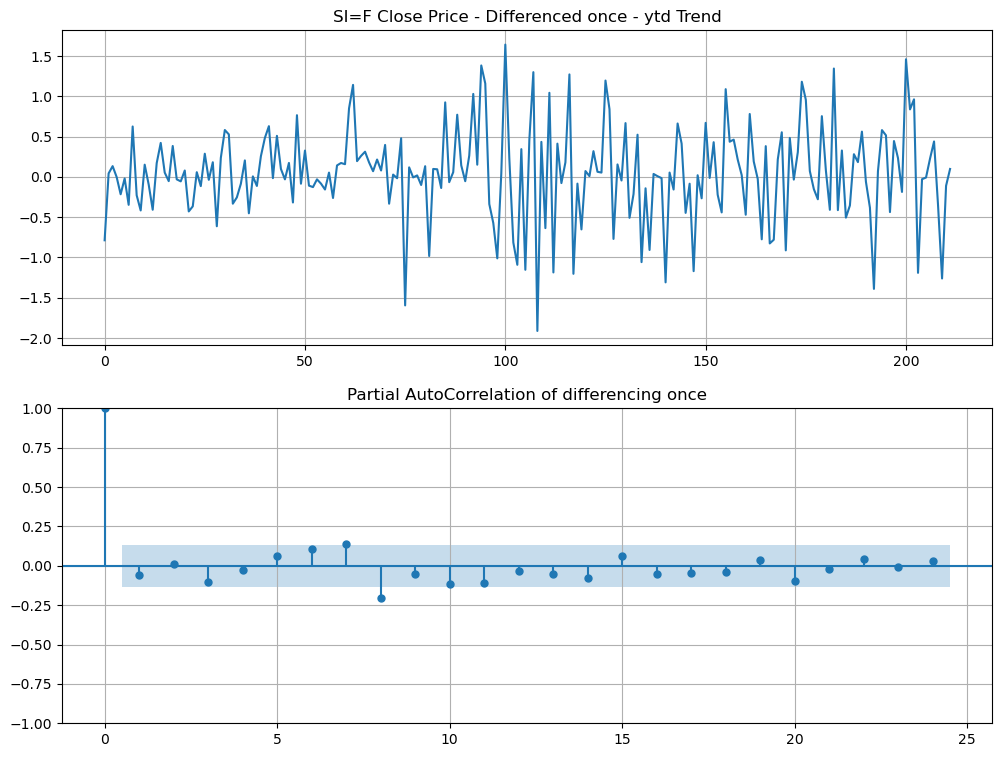

In [ ]:
tickers = {"AAPL",  "AMD",  "AMZN",  "ASML",  "AXON",  "BWXT",  "BYD",  "GOOG",  "INTC",  "NVDA",  "TSLA"}
type = "METALS"


for ticker in tickers:
    comp = yf.Ticker(ticker=ticker)

    if not os.path.exists(path=f"{type}/{ticker}"):
        os.makedirs(f"{type}/{ticker}")

    periods = {"max": 365,
            "5y": 365,
            "2y": 52,
            "1y": 52,
            "ytd": 52}

    for period in periods.keys():
        stock = cd.DataFrame(comp.history(period).to_dict())
        close = stock["Close"].dropna().to_numpy()
        if (close.shape[0] == 0):
            break
        stock_tsa = seasonal_decompose(x=close, model="additive", period=periods[period])
        plot_decompose(stock_tsa, ticker, period, type)
        plot_acfs(close, ticker,period, type)
        plot_diff(ticker, stock["Close"], period, type)
    
    

In [62]:
import cupy as cp

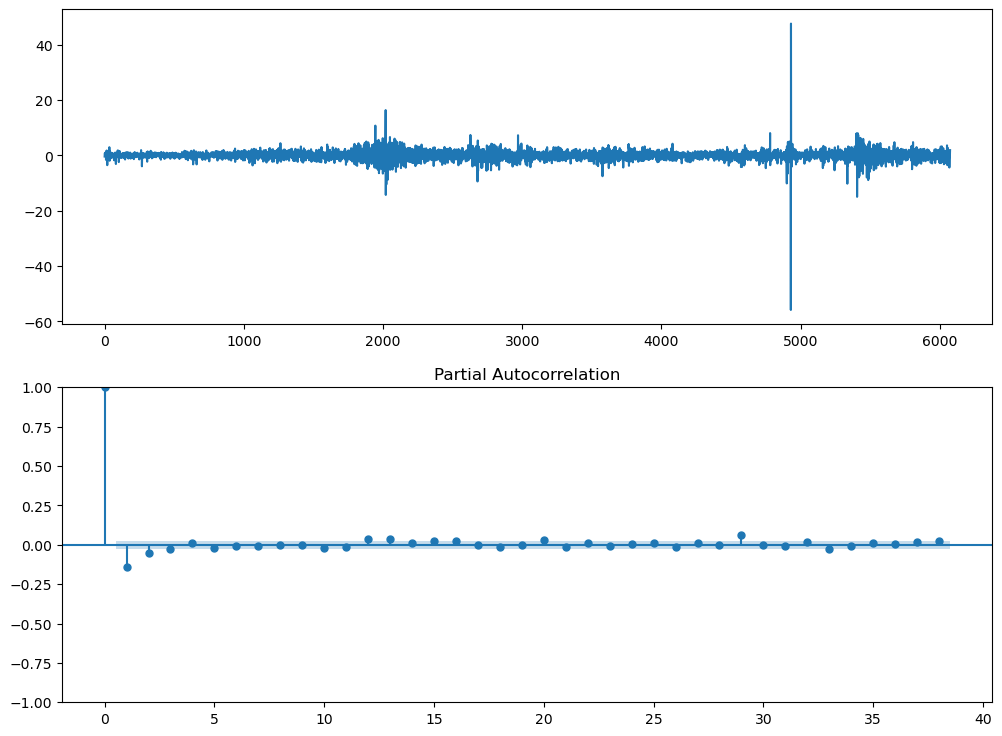

In [ ]:
from pmdarima.arima import ndiffs

def differencing(ticker, close, period):
    d = ndiffs(stock_smh["Close"].to_numpy())
    a=str("")
    match d:
        case 1:
            a="once"
            diff_close = close.diff().dropna().to_numpy()
        case 2:
            a="twice"
            diff_close = close.diff().diff().dropna().to_numpy()
        case 3:
            a="thrice"
            diff_close = close.diff().diff().diff().dropna().to_numpy()
        case _:
            a="None"
            diff_close = close.to_numpy()

    fig,(ax1,ax2) = plt.subplots(2,1)
    fig.set_size_inches(12,9)
    ax1.plot(range(0,len(diff_close)), diff_close)
    plot_pacf(diff_close, ax=ax2);

    ax1.set_title(f"{ticker} Close Price - Differenced {a} - {period} Trend")
    ax2.set_title(f"Partial AutoCorrelation of differencing {a}")


In [56]:
stock_smh["Close"].diff().dropna().reset_index(drop=True).to_numpy()

array([-0.42000008,  0.42000008,  0.81999969, ...,  0.65000153,
        0.22999573,  1.88999939])

In [ ]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
diff1 = stock_smh["Close"].diff().dropna().to_numpy()
diff2 = stock_smh["Close"].diff().diff().dropna().to_numpy()
diff3 = stock_smh["Close"].diff().diff().diff().dropna().to_numpy()
ax1.plot(range(0,len(diff1)), diff1)
ax2.plot(range(0,len(diff1)), diff1)
ax3.plot(range(0,len(diff1)), diff1)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(stock["Close"].to_numpy());

In [ ]:

close = stock_smh["Close"].to_numpy()

stock_tsa = seasonal_decompose(x=close, model="additive", period=1)

In [ ]:
fig,(ax1,ax2,ax3)= plt.subplot(311)

In [ ]:
plt.plot(stock_smh["Close"].to_numpy())
plt.title("Closing price of SMH")

In [ ]:
stock = cd.DataFrame(smh.history().to_dict())